In [1016]:
# Importing libraries and Setting Dislplay Options

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats


from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [1300]:
# Scraping Fifa2020 Player's Detail Characteristics Data from web site

player_list = []

i = 0
while i < 3000:
    url_list = "https://sofifa.com/?&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=rc&showCol%5B%5D=ta&showCol%5B%5D=cr&showCol%5B%5D=fi&showCol%5B%5D=he&showCol%5B%5D=sh&showCol%5B%5D=vo&showCol%5B%5D=ts&showCol%5B%5D=dr&showCol%5B%5D=cu&showCol%5B%5D=fr&showCol%5B%5D=lo&showCol%5B%5D=bl&showCol%5B%5D=to&showCol%5B%5D=ac&showCol%5B%5D=sp&showCol%5B%5D=ag&showCol%5B%5D=re&showCol%5B%5D=ba&showCol%5B%5D=tp&showCol%5B%5D=so&showCol%5B%5D=ju&showCol%5B%5D=st&showCol%5B%5D=sr&showCol%5B%5D=ln&showCol%5B%5D=te&showCol%5B%5D=ar&showCol%5B%5D=in&showCol%5B%5D=po&showCol%5B%5D=vi&showCol%5B%5D=pe&showCol%5B%5D=cm&showCol%5B%5D=td&showCol%5B%5D=ma&showCol%5B%5D=sa&showCol%5B%5D=sl&showCol%5B%5D=tg&showCol%5B%5D=gd&showCol%5B%5D=gh&showCol%5B%5D=gc&showCol%5B%5D=gp&showCol%5B%5D=gr&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&showCol%5B%5D=pac&showCol%5B%5D=sho&showCol%5B%5D=pas&showCol%5B%5D=dri&showCol%5B%5D=def&showCol%5B%5D=phy&offset="+str(i)
    #print(url_list)
    response = requests.get(url_list)
    #print(response)
    page = response.text
    #print(page)
    soup = BeautifulSoup(page,"lxml")
    #print(soup.prettify)
    rows = soup.find_all("tr")
    #print(rows)
    for row in rows:
        cells = row.find_all('td')
        #print(cells)
        cells_to_string = str(cells)
        cells_sub = (re.sub(re.compile('<.*?>'),'',cells_to_string))
        #print(cells_sub)
        player_list.append(cells_sub)
        result = pd.DataFrame(player_list)
    i += 60

In [1301]:
print("Number of All Rows")
print(len(result));
print("")
print("Number of Rows Without Duplicated")
result.drop_duplicates(subset=None, keep="first", inplace=True)
print(len(result))

Number of All Rows
61

Number of Rows Without Duplicated
61


In [1413]:
#Saving result data frame as a Pickle File
result.to_pickle("PlayerListInitialPickle")

In [1414]:
#Reading result from Pickle File as a data frame
result = pd.read_pickle("PlayerListInitialPickle")

In [1296]:
# Getting table name (header)
table_players = soup.find("table",attrs={"class":"table table-hover persist-area"})
header_players = table_players.find_all("th")
column_name_players = []
for row in header_players:
    column_name_players.append(row.text)
column_name_players

['',
 'Name',
 'Age',
 'OVA',
 'POT',
 'Team & Contract',
 'ID',
 'Height',
 'Weight',
 'foot',
 'BOV',
 'BP',
 'Growth',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits']

In [1297]:
# Setting columns names
new_column_name_players = [
 'Name',
 'Age',
 'Overall',
 'Potential',
 'Team',
 'Height',
 'Weight',
 'Foot',
 'Best_Overall',
 'Position',
 'Growth',
 'Value',
 'Wage',
 'Release_Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

In [1302]:
result

,0
0,[]
1,"[\n, \n Ferrán TorresRM LM CF, 19, 79, 88, \n\..."
2,"[\n, \n J. VeltmanCB RB, 27, 79, 80, \n\n\n\nA..."
3,"[\n, \n 18 S. DíazST, 19, 67, 81, \n\n\n\nCD L..."
4,"[\n, \n O. WatkinsST RW LW, 23, 76, 81, \n\n\n..."
5,"[\n, \n S. BenrahmaLW RW RM, 23, 76, 81, \n\n\..."
6,"[\n, \n David NeresRW CAM, 22, 81, 86, \n\n\n\..."
7,"[\n, \n C. ImmobileST, 29, 87, 87, \n\n\n\nLaz..."
8,"[\n, \n B. MbeumoRW ST RM, 19, 74, 85, \n\n\n\..."
9,"[\n, \n Pedro GonçalvesCM, 21, 75, 86, \n\n\n\..."


In [644]:
#Data Cleaning
result = pd.read_pickle("PlayerListInitialPickle")

result = result[0].str.split(',',expand=True)


result[1] = result[1].str.replace("\n ","")

chars_to_remove = ["GK","RB","RCB","CB","LCB","LB","RWB","RDM","CDM","LDM","LWB","RM","RCM","CM","LCM","LM","LAM","CAM","RAM","RW","RF","CF","LF","LW","LS","ST","RS"]
for char in chars_to_remove:
    result[1]=result[1].str.replace(char,"")
    result[1]=result[1].str.lstrip()

result[5] = result[5].str.replace("\n\n\n\n","")
result[5] = result[5].str.split("\n").str[0]
result[5] = result[5].str.strip()

result[6] = result[6].replace(r'Loan', np.nan, regex=True)
result = result.iloc[1:]

result_WoLoan = result[result[6].notna()]

result_WoLoan.drop(result_WoLoan.columns[[0,6,66,67,68,69]],axis=1, inplace=True)

mask_loan = result[6].isnull()

result_loan = result.loc[mask_loan].shift(-1, axis=1)

result_loan.drop_duplicates(subset=[6], keep="first", inplace=True)

result_loan.drop(result_loan.columns[[5,6,66,67,68,69]],axis=1, inplace=True)

result_WoLoan.columns = new_column_name_players

result_loan.columns = new_column_name_players

result_master = pd.concat([result_WoLoan,result_loan]).reset_index()
del result_master["index"]

result_master.drop_duplicates(subset=None, keep="first",inplace=True)

#result_master

/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [645]:
#Cleaning some characters

result_master = result_master[~result_master["Height"].str.contains("~")]
result_master = result_master[~result_master["Age"].str.contains("\n")]
result_master = result_master[result_master["Height"].str.contains("'")]

In [646]:
#Converting Height column to cm

result_master["Height"] = result_master["Height"].str[:-1]

def parse_height(height):
    # format: 5'11"
    height = height.split("'")
    feet = float(height[0])
    inch = float(height[1])
    return ((feet*30.48) + (inch*2.54))

result_master["Height"]=round(result_master["Height"].apply(lambda x:parse_height(x)),0)

In [647]:
#Converting Weight column to kg
result_master["Weight"] = round(result_master["Weight"].str.split("lbs").str[0].astype(float)*0.45359237,0)

In [648]:
#Cleaning to Value column and convert to decimal
result_master["Value"] = result_master["Value"].str.replace("€","")
result_master["Value"] = result_master["Value"].str.replace("M","")
result_master.loc[result_master["Value"].str.contains("K"),"Value"]=result_master["Value"].str.split("K").str[0].astype(float)/1000
result_master["Value"] = round(result_master["Value"].astype(float),2)
result_master = result_master.loc[result_master["Value"]>0]

In [649]:
#Cleaning Wage column and convert to decimal
result_master["Wage"] = result_master["Wage"].str.replace("€","")
result_master.loc[result_master["Wage"].str.contains("K"),"Wage"]=result_master["Wage"].str.split("K").str[0].astype(float)*1000
result_master["Wage"] = round(result_master["Wage"].astype(float)/1000000,5)


In [650]:
#Cleaning Release_Clause column and convert to decimal
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("€","")
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("M","")
result_master.loc[result_master["Release_Clause"].str.contains("K"),"Release_Clause"]=result_master["Release_Clause"].str.split("K").str[0].astype(float)/1000
result_master["Release_Clause"] = round(result_master["Release_Clause"].astype(float),2)

In [651]:
#Checking Height,Weight,Value,Wage and Release_Clause columns
result_master.head(10)

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,Z. Ibrahimović,37,85,85,Milan,196.0,95.0,Right,85,ST,0,14.00,0.058,23.80,400,68,86,80,78,88,397,80,80,78,73,86,304,56,55,72,82,39,392,90,68,59,87,88,368,84,20,91,84,89,90,89,28,37,24,59,13,15,10,9,12,2009,411,5 ★,55,88,77,79,34,78
1,A. Kanno,29,62,62,Al Fayha,180.0,67.0,Right,62,CB,0,0.25,0.004,0.41,201,33,24,60,55,29,203,50,28,24,48,53,294,56,61,63,54,60,285,37,86,66,71,25,231,60,58,28,49,36,52,185,61,62,62,54,12,7,14,9,12,1453,314,1 ★,59,28,45,53,61,68
2,Brahim,19,74,86,Real Madrid,170.0,68.0,Left,75,CAM,12,10.00,0.063,22.50,286,60,69,30,72,55,332,82,72,47,50,81,394,78,75,83,70,88,291,70,65,54,35,67,258,41,20,69,70,58,72,87,43,23,21,51,13,9,13,10,6,1699,362,1 ★,76,68,65,82,29,42
3,M. Aarons,19,73,85,Norwich City,178.0,73.0,Right,74,RB,12,6.50,0.017,14.30,269,64,41,53,70,41,286,73,50,32,57,74,393,84,80,82,68,79,274,46,49,79,64,36,284,68,69,64,56,27,75,217,74,73,70,46,11,11,7,9,8,1769,396,1 ★,82,41,61,74,70,68
4,J. David,19,77,88,KAA Gent,178.0,77.0,Right,79,ST,11,15.00,0.013,25.50,363,63,81,72,76,71,320,79,56,34,73,78,399,85,87,78,71,78,379,75,80,81,74,69,268,25,17,75,73,78,83,61,21,21,19,39,7,7,11,7,7,1829,400,1 ★,86,76,69,78,25,66
5,M. Ginter,25,82,83,Borussia Mönchengladbach,190.0,86.0,Right,82,CB,1,23.50,0.036,41.70,336,68,55,83,77,53,291,61,44,42,71,73,310,54,69,55,83,49,342,74,67,74,81,46,344,69,84,55,69,67,71,247,85,85,77,46,12,10,6,8,10,1916,414,3 ★,62,58,69,65,84,76
6,S. Tonali,19,77,91,Brescia,180.0,80.0,Right,78,CM,14,18.00,0.008,43.70,341,70,60,69,82,60,386,76,75,75,81,79,384,83,78,74,74,75,364,75,64,75,80,70,352,76,74,60,78,64,74,216,70,74,72,44,13,9,8,7,7,2087,449,1 ★,80,65,78,77,72,77
7,O. Kabak,19,77,86,FC Schalke 04,185.0,86.0,Right,78,CB,9,12.00,0.015,22.80,236,26,35,77,70,28,268,65,32,31,68,72,338,69,74,62,73,60,307,48,84,65,85,25,286,78,71,30,60,47,75,227,73,80,74,44,10,13,10,6,5,1706,384,1 ★,72,36,55,67,75,79
8,J. Sancho,19,86,94,Borussia Dortmund,180.0,76.0,Right,87,CAM,8,63.50,0.072,120.70,371,81,81,38,88,83,376,92,81,48,64,91,441,89,85,91,86,90,324,69,51,78,63,63,307,42,39,82,87,57,83,105,32,41,32,52,7,11,10,11,13,1976,431,2 ★,87,74,80,91,37,62
9,A. Lallana,31,78,78,Liverpool,178.0,73.0,Right,78,CM,0,9.00,0.080,16.70,366,74,70,67,83,72,383,81,77,66,75,84,358,69,64,77,73,75,332,72,68,61,60,71,364,76,63,74,81,70,80,185,61,62,62,54,6,15,14,8,11,2042,422,3 ★,66,71,78,81,62,64


In [652]:
#Deleting some rows that composure columns is blank (Ronaldinho, Juninho, Xavi etc)
result_master = result_master.loc[result_master["Composure"]!=" "]
result_master = result_master[result_master["Base_Stats"]!=' ']

In [654]:
#Cleaning to IR column
result_master["Int_Reputation"]=result_master["Int_Reputation"].str[:-1]

In [655]:
#Checking null values
result_master.isnull().any()

Name                False
Age                 False
Overall             False
Potential           False
Team                False
Height              False
Weight              False
Foot                False
Best_Overall        False
Position            False
Growth              False
Value               False
Wage                False
Release_Clause      False
Attacking           False
Crossing            False
Finishing           False
Heading_Accuracy    False
Short_Passing       False
Volleys             False
Skill               False
Dribbling           False
Curve               False
FK_Accuracy         False
Long_Passing        False
Ball_Control        False
Movement            False
Acceleration        False
Sprint_Speed        False
Agility             False
Reactions           False
Balance             False
Power               False
Shot_Power          False
Jumping             False
Stamina             False
Strength            False
Long_Shots          False
Mentality   

In [656]:
#Checking columns dtypes
result_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17779 entries, 0 to 19305
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              17779 non-null  object 
 1   Age               17779 non-null  object 
 2   Overall           17779 non-null  object 
 3   Potential         17779 non-null  object 
 4   Team              17779 non-null  object 
 5   Height            17779 non-null  float64
 6   Weight            17779 non-null  float64
 7   Foot              17779 non-null  object 
 8   Best_Overall      17779 non-null  object 
 9   Position          17779 non-null  object 
 10  Growth            17779 non-null  object 
 11  Value             17779 non-null  float64
 12  Wage              17779 non-null  float64
 13  Release_Clause    17779 non-null  float64
 14  Attacking         17779 non-null  object 
 15  Crossing          17779 non-null  object 
 16  Finishing         17779 non-null  object

In [658]:
#Converting to int dtypes

cols_to_convert=['Age',
 'Overall',
 'Potential',
 'Best_Overall',
 'Growth',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

for col in cols_to_convert:
    result_master[col] = result_master[col].astype("int")

In [659]:
result_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17779 entries, 0 to 19305
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              17779 non-null  object 
 1   Age               17779 non-null  int64  
 2   Overall           17779 non-null  int64  
 3   Potential         17779 non-null  int64  
 4   Team              17779 non-null  object 
 5   Height            17779 non-null  float64
 6   Weight            17779 non-null  float64
 7   Foot              17779 non-null  object 
 8   Best_Overall      17779 non-null  int64  
 9   Position          17779 non-null  object 
 10  Growth            17779 non-null  int64  
 11  Value             17779 non-null  float64
 12  Wage              17779 non-null  float64
 13  Release_Clause    17779 non-null  float64
 14  Attacking         17779 non-null  int64  
 15  Crossing          17779 non-null  int64  
 16  Finishing         17779 non-null  int64 

In [660]:
#Descriptive Statistics of numeric columns
result_master.describe()

,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
count,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000
mean,22.228922,62.527476,70.803589,180.624107,74.044941,62.948254,8.276112,1.993736,0.007271,3.414558,233.660273,45.977502,43.084032,49.406997,55.324090,39.867653,239.247202,52.917431,43.544350,38.915406,48.801732,55.068283,309.713370,63.671579,63.613814,61.206367,57.527982,63.693627,278.850273,53.525451,62.321334,59.227178,60.944204,42.832105,236.758648,51.316384,41.848979,47.089825,50.262051,46.241408,53.606727,129.771978,42.541482,44.331852,42.898644,76.683334,15.462006,15.318634,15.168120,15.189662,15.544913,1504.685078,336.173126,1.077788,66.783790,49.993532,53.719501,59.663536,45.659711,60.353057
std,4.075507,7.796487,6.553878,6.732665,6.936865,8.029030,5.737506,5.589839,0.020611,10.559454,72.775296,17.575076,19.420848,16.535818,15.027216,16.829486,77.234654,18.810945,17.215603,15.722662,15.487238,16.973899,57.930748,15.228166,15.000481,14.619377,10.016532,14.037284,52.084435,14.612375,11.143833,15.482402,12.751453,18.684673,63.129289,16.571433,20.528707,19.041617,13.557377,15.340794,12.568096,59.878214,19.783796,20.931763,20.381384,77.242076,16.065994,15.531948,15.223424,15.295232,16.284308,277.576124,44.037327,0.350611,9.796974,13.927791,10.934299,10.739271,16.668600,9.972391
min,16.000000,45.000000,46.000000,155.000000,50.000000,44.000000,0.000000,0.010000,0.000000,0.000000,42.000000,6.000000,2.000000,5.000000,8.000000,3.000000,40.000000,4.000000,4.000000,5.000000,5.000000,8.000000,112.000000,11.000000,11.000000,15.000000,21.000000,17.000000,117.000000,6.000000,22.000000,12.000000,20.000000,4.000000,50.000000,2.000000,3.000000,2.000000,10.000000,6.000000,12.000000,21.000000,3.000000,6.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,725.000000,206.000000,1.000000,23.000000,14.000000,24.000000,23.000000,12.000000,27.000000
25%,19.000000,57.000000,66.000000,175.000000,70.000000,57.000000,3.000000,0.160000,0.000800,0.200000,206.000000,34.000000,28.000000,42.000000,48.000000,29.000000,202.000000,46.000000,32.000000,29.000000,37.000000,49.000000,286.000000,58.000000,58.000000,53.000000,51.000000,56.000000,249.000000,44.000000,56.000000,53.000000,52.000000,29.000000,211.000000,39.000000,22.000000,36.000000,40.000000,38.000000,45.000000,74.000000,25.000000,24.000000,23.000000,47.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1367.000000,304.000000,1.000000,60.000000,39.000000,47.000000,54.000000,30.000000,53.000000
50%,21.000000,62.000000,71.000000,180.000000,74.000000,62.000000,8.000000,0.400000,0.002000,0.560000,244.000000,48.000000,45.000000,52.000000,58.000000,40.000000,249.000000,58.000000,43.000000,38.000000,51.000000,59.000000,317.000000,66.000000,66.

In [661]:
#Saving Final Player List as Pickle
result_master.to_pickle("PlayerListFinalPickle")

In [1308]:
#Reading Final Player List
player_list= pd.read_pickle("PlayerListFinalPickle")

# Exploratory Data Analyis

In [663]:
#Top 5 Valuable Player
player_list.nlargest(5,columns="Value")[["Name","Age","Team","Value"]]

,Name,Age,Team,Value
212,Neymar Jr,27,Paris Saint-Germain,105.5
58,L. Messi,32,FC Barcelona,95.5
95,K. Mbappé,20,Paris Saint-Germain,93.5
219,V. van Dijk,27,Liverpool,90.0
338,E. Hazard,28,Real Madrid,90.0


In [664]:
#Top 5 Rating Player
player_list.nlargest(5,columns="Overall")[["Name","Age","Team","Overall"]]

,Name,Age,Team,Overall
58,L. Messi,32,FC Barcelona,94
397,Cristiano Ronaldo,34,Juventus,93
212,Neymar Jr,27,Paris Saint-Germain,92
195,J. Oblak,26,Atlético Madrid,91
219,V. van Dijk,27,Liverpool,91


In [665]:
#Mean Value (Top 5) based on Position

pd.DataFrame(player_list.groupby("Position").Value.mean().sort_values(ascending=False)).head(5)

,Value
Position,
CF,4.733175
CM,3.583234
LW,3.570633
CAM,2.726139
LWB,2.306283


In [666]:
#Top 5 Clup (Mean Value)

pd.DataFrame(player_list.groupby("Team").Value.mean().sort_values(ascending=False).head(5))

,Value
Team,
FC Bayern München,28.168000
Real Madrid,25.063235
FC Barcelona,24.845313
Juventus,24.695417
Manchester City,24.036250


In [667]:
#Top 5 Clup (Total Value)

pd.DataFrame(player_list.groupby("Team").Value.sum().sort_values(ascending=False).head(5))

,Value
Team,
Real Madrid,852.15
FC Barcelona,795.05
Liverpool,771.31
Manchester City,769.16
Paris Saint-Germain,739.20


In [668]:
#Age , Height and Weight Stats
player_list[["Age","Height","Weight"]].describe()

,Age,Height,Weight
count,17779.000000,17779.000000,17779.000000
mean,22.228922,180.624107,74.044941
std,4.075507,6.732665,6.936865
min,16.000000,155.000000,50.000000
25%,19.000000,175.000000,70.000000
50%,21.000000,180.000000,74.000000
75%,24.000000,185.000000,78.000000
max,45.000000,211.000000,110.000000


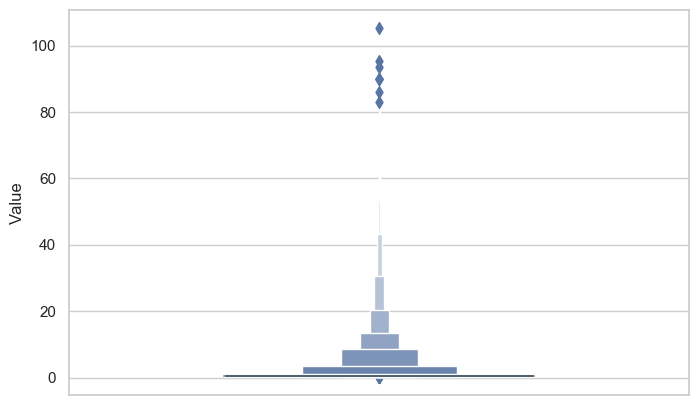

In [669]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='Value', data=player_list, width=0.5)
plt.show()

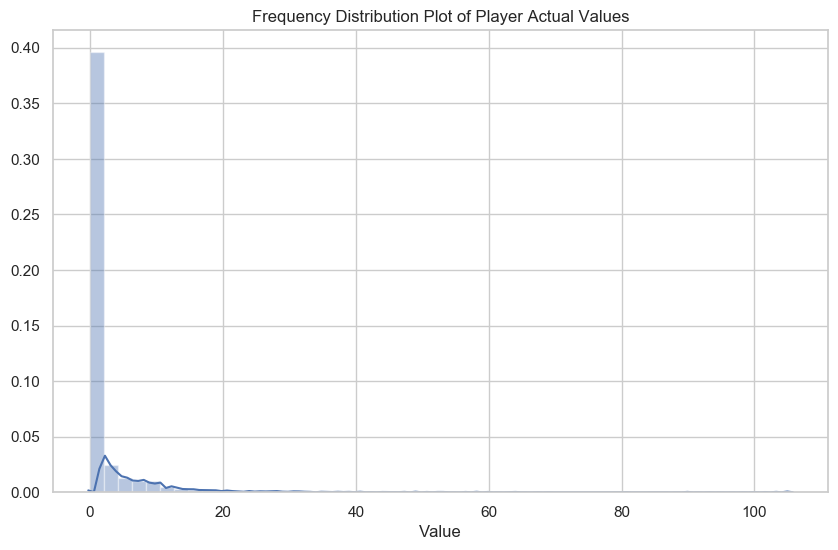

In [670]:
x = player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

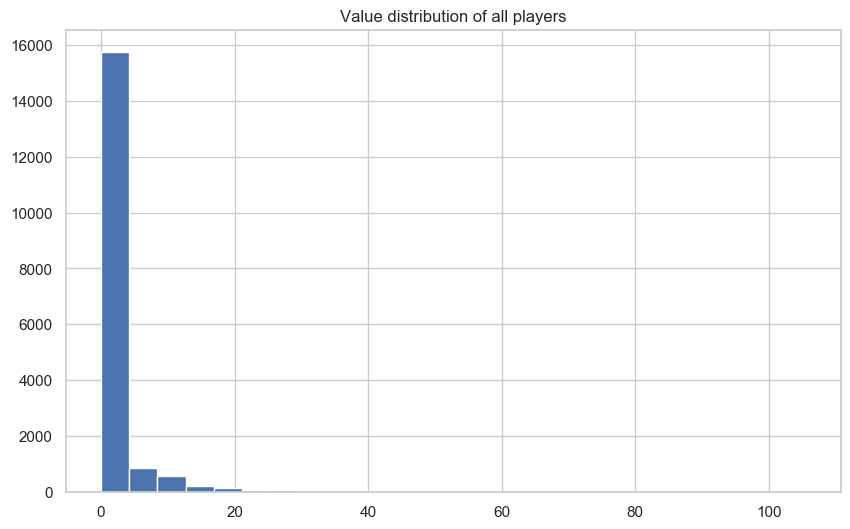

In [671]:
plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=player_list)
plt.title('Value distribution of all players')
plt.show()

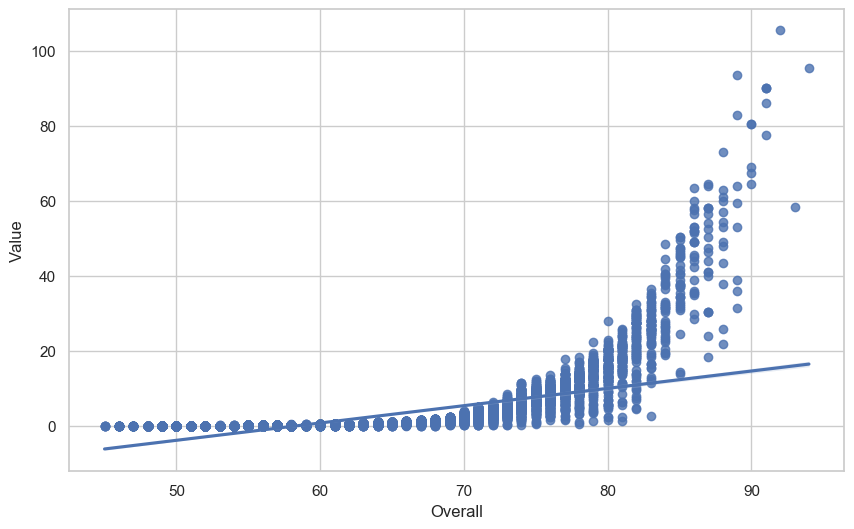

In [672]:
plt.figure(figsize=(10,6))
sns.regplot(x="Overall",y="Value",data=player_list)
plt.show()

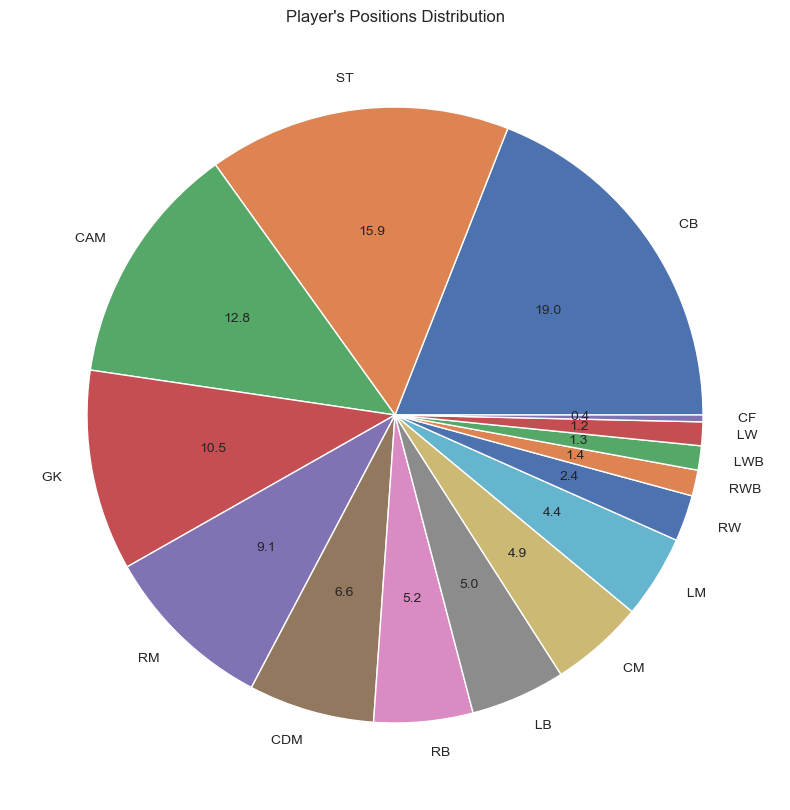

In [673]:
plt.figure(figsize=(10,10))
loc=player_list.Position.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

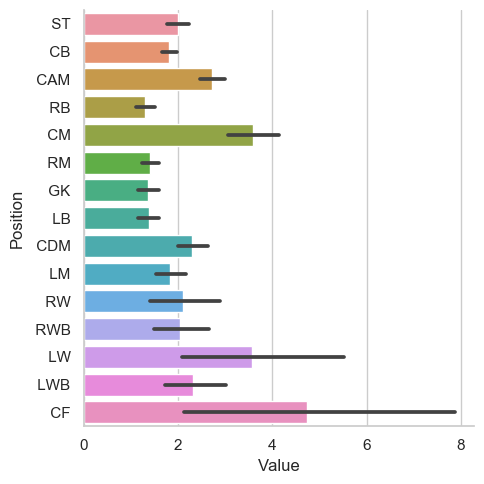

In [674]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="Position", x="Value", kind="bar",  data=player_list)
plt.show()

# Modelling

In [675]:
#Changing columns order
player_list = player_list[['Name','Value','Age','Overall','Potential','Team','Height','Weight','Foot','Best_Overall',
                           'Position','Growth','Wage','Release_Clause','Attacking','Crossing','Finishing',
                           'Heading_Accuracy','Short_Passing','Volleys','Skill','Dribbling','Curve','FK_Accuracy',
                           'Long_Passing','Ball_Control','Movement','Acceleration','Sprint_Speed','Agility',
                           'Reactions','Balance','Power','Shot_Power','Jumping','Stamina','Strength','Long_Shots',
                           'Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
                           'Defending','Marking','Standing_Tackle','Sliding_Tackle','Goalkeeping','GK_Diving',
                           'GK_Handling','GK_Kicking','GK_Positioning','GK_Reflexes','Total_Stats','Base_Stats',
                           'Int_Reputation','PAC','SHO','PAS','DRI','DEF','PHY']]
player_list

,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,Z. Ibrahimović,14.00,37,85,85,Milan,196.0,95.0,Right,85,ST,0,0.0580,23.80,400,68,86,80,78,88,397,80,80,78,73,86,304,56,55,72,82,39,392,90,68,59,87,88,368,84,20,91,84,89,90,89,28,37,24,59,13,15,10,9,12,2009,411,5,55,88,77,79,34,78
1,A. Kanno,0.25,29,62,62,Al Fayha,180.0,67.0,Right,62,CB,0,0.0040,0.41,201,33,24,60,55,29,203,50,28,24,48,53,294,56,61,63,54,60,285,37,86,66,71,25,231,60,58,28,49,36,52,185,61,62,62,54,12,7,14,9,12,1453,314,1,59,28,45,53,61,68
2,Brahim,10.00,19,74,86,Real Madrid,170.0,68.0,Left,75,CAM,12,0.0630,22.50,286,60,69,30,72,55,332,82,72,47,50,81,394,78,75,83,70,88,291,70,65,54,35,67,258,41,20,69,70,58,72,87,43,23,21,51,13,9,13,10,6,1699,362,1,76,68,65,82,29,42
3,M. Aarons,6.50,19,73,85,Norwich City,178.0,73.0,Right,74,RB,12,0.0170,14.30,269,64,41,53,70,41,286,73,50,32,57,74,393,84,80,82,68,79,274,46,49,79,64,36,284,68,69,64,56,27,75,217,74,73,70,46,11,11,7,9,8,1769,396,1,82,41,61,74,70,68
4,J. David,15.00,19,77,88,KAA Gent,178.0,77.0,Right,79,ST,11,0.0130,25.50,363,63,81,72,76,71,320,79,56,34,73,78,399,85,87,78,71,78,379,75,80,81,74,69,268,25,17,75,73,78,83,61,21,21,19,39,7,7,11,7,7,1829,400,1,86,76,69,78,25,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19301,C. Timite,1.10,21,67,74,Paris FC,178.0,79.0,Right,68,ST,7,0.0030,0.00,295,59,62,61,59,54,280,70,48,40,54,68,373,82,80,75,62,74,325,76,67,65,69,48,255,50,30,67,52,56,57,101,30,33,38,47,9,7,11,10,10,1676,367,1,81,62,55,70,35,64
19302,17 D. Bravo,0.15,18,56,69,San Luis de Quillota,173.0,70.0,Left,55,LB,13,0.0005,0.00,189,49,30,45,45,20,213,55,32,30,43,53,321,70,68,66,45,72,260,35,65,75,57,28,194,40,50,40,31,33,45,165,51,55,59,40,7,13,7,6,7,1382,308,1,69,31,41,56,52,59
19303,K. Miyoshi,3.30,22,71,78,Royal Antwerp FC,168.0,64.0,Left,72,CAM,7,0.0070,0.00,301,68,65,37,70,61,335,71,69,63,62,70,419,92,74,94,70,89,349,68,90,71,51,69,253,43,26,57,71,56,57,117,38,35,44,49,8,9,15,7,10,1823,380,1,82,65,68,74,35,56
19304,18 F. Banega,0.45,20,61,73,San Martín de San Juan,170.0,62.0,Right,63,CAM,12,0.0020,0.00,249,49,45,49,69,37,262,61,39,35,61,66,362,71,68,85,61,77,254,44,71,65,31,43,259,52,43,55,68,41,41,153,48,55,50,51,13,12,6,10,10,1590,334,1,69,44,60,66,49,46


In [676]:
#View the correlations
corr_mat = player_list.corr()
corr_mat

,Value,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
Value,1.000000,0.232675,0.643972,0.539029,0.041196,0.090758,0.634359,-0.259343,0.866144,0.964253,0.341755,0.293548,0.269005,0.227099,0.359305,0.316901,0.352725,0.288667,0.337779,0.314941,0.348765,0.332528,0.277920,0.174417,0.182265,0.224189,0.574863,0.119280,0.393770,0.378049,0.188941,0.270020,0.222983,0.313394,0.367805,0.261119,0.199215,0.283558,0.411110,0.249630,0.499725,0.167281,0.199661,0.159277,0.134070,-0.004040,-0.004741,-0.005204,-0.005102,-0.001352,-0.003482,0.438248,0.563328,0.642263,0.247778,0.365757,0.472387,0.456563,0.222502,0.351836
Age,0.232675,1.000000,0.542752,-0.117799,0.079967,0.227628,0.510822,-0.872086,0.290261,0.206696,0.256762,0.220964,0.171469,0.229595,0.262213,0.221961,0.237453,0.152200,0.224066,0.239692,0.266256,0.219571,0.096133,-0.012479,0.000304,0.075867,0.492487,-0.020490,0.373959,0.304941,0.207367,0.216518,0.378451,0.242586,0.313466,0.301424,0.221008,0.187637,0.275036,0.192633,0.421884,0.177043,0.217046,0.164431,0.140581,0.043392,0.039487,0.039647,0.040250,0.051970,0.042610,0.345179,0.461985,0.385832,0.000442,0.294065,0.380225,0.300617,0.251343,0.468205
Overall,0.643972,0.542752,1.000000,0.692988,0.057984,0.164052,0.990191,-0.567272,0.579708,0.596247,0.550160,0.483248,0.411860,0.415236,0.586469,0.467451,0.555318,0.466753,0.509053,0.471362,0.550142,0.554664,0.423824,0.276685,0.293892,0.356691,0.857472,0.151528,0.655177,0.603487,0.307643,0.453171,0.434452,0.498899,0.587908,0.463299,0.352883,0.436845,0.584539,0.387816,0.762931,0.313858,0.362790,0.300071,0.261754,-0.048357,-0.049133,-0.051266,-0.053413,-0.038128,-0.046257,0.698104,0.878273,0.485022,0.360627,0.523384,0.703105,0.690432,0.390810,0.625448
Potential,0.539029,-0.117799,0.692988,1.000000,0.022290,0.020061,0.706471,0.200611,0.446525,0.508578,0.388389,0.335234,0.303006,0.267785,0.428259,0.334242,0.415351,0.372112,0.379576,0.333103,0.395192,0.423439,0.359837,0.269872,0.276059,0.307874,0.573829,0.167145,0.413567,0.431660,0.180840,0.284398,0.180944,0.348259,0.397164,0.274206,0.215242,0.312126,0.432685,0.280338,0.535510,0.203913,0.229736,0.196613,0.174153,-0.054052,-0.052075,-0.055038,-0.058290,-0.048372,-0.052590,0.489373,0.610877,0.325537,0.353043,0.363544,0.493326,0.532098,0.243240,0.322518
Height,0.041196,0.079967,0.057984,0.022290,1.000000,0.760196,0.036654,-0.053331,0.042851,0.035241,-0.322669,-0.439367,-0.324617,0.023223,-0.309657,-0.308200,-0.404477,-0.435693,-0.389118,-0.368811,-0.283168,-0.362955,-0.555151,-0.486550,-0.415986,-0.544849,-0.009944,-0.744168,-0.092784,-0.152725,0.018395,-0.229908,0.534341,-0.324329,-0.272513,-0.017416,-0.033513,-0.391399,-0.310173,-0.297833,-0.127292,-0.055939,-0.053049,-0.047321,-0.064249,0.352710,0.347001,0.347689,0.347562,0.345291,0.349812,-0.306309,-0.064883,0.049608,-0.355377,-0.039885,-0.138152,-0.240186,0.070203,0.411104
Weight,0.090758,0.227628,0.164052,0.020061,0.760196,1.000000,0.140099,-0.200009,0.096533,0.082774,-0.229229,-0.346892,-0.236209,0.065970,-0.226455,-0.219023,-0.310315,-0.347364,-0.299503,-0.278352,-0.210980,-0.272937,-0.452232,-0.415018,-0.352358,-0.458912,0.086083,-0.623047,0.028630,-0.052293,0.080705,-0.155523,0.625481,-0.225425,-0.178637,0.050357,-0.006047,-0.299875,-0.226597,-0.208949,-0.031137,-0.033095,-0.021449,-0.028009,-0.047644,0.314983,0.308452,0.309916,0.309028,0.311357,0.312819,-0.195569,0.043254,0.110985,-0.293977,0.038011,-0.059708,-0.147154,0.089054,0.501812
Best_Overall,0.634359,0.510822,0.99019

In [677]:
#Correlation With Value (most correlated with positive)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=False).head(10)

,Value
Value,1.000000
Release_Clause,0.964253
Wage,0.866144
Overall,0.643972
Int_Reputation,0.642263
Best_Overall,0.634359
Reactions,0.574863
Base_Stats,0.563328
Potential,0.539029
Composure,0.499725


In [1312]:
#Correlation With Value (modes correlated with negative)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=True).head(7)

,Value
Growth,-0.259343
GK_Handling,-0.005204
GK_Kicking,-0.005102
GK_Diving,-0.004741
Goalkeeping,-0.004040
GK_Reflexes,-0.003482
GK_Positioning,-0.001352


In [742]:
# Slice data into faeture and target

Xb= player_list.drop(columns=["Value","Name","Team","Foot","Position"])
yb= player_list.loc[:,"Value"]

In [823]:
# fit model with target as player market value 
player_modelb = sm.OLS(yb, Xb, data=player_list)

resultsb = player_modelb.fit()

print(resultsb.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              7422.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:52:10   Log-Likelihood:                         -29609.
No. Observations:               17779   AIC:                                  5.932e+04
Df Residuals:                   17730   BIC:                                  5.970e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [858]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(X,y)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

,Wage,IR,Release_Clause,Overall,Potential,Height,SHO,Stamina,Volleys,Reactions,Marking,Positioning,PAS,GK_Diving,FK_Accuracy,Balance,GK_Reflexes,Strength,Movement,Composure,Long_Passing,Dribbling,Power,Vision,Defending,PAC,Aggression,Short_Passing,Total_Stats,Acceleration,GK_Kicking,Jumping,Finishing,Curve,Goalkeeping,GK_Positioning,Mentality,Base_Stats,Attacking,Skill,Interceptions,Sprint_Speed,Sliding_Tackle,DRI,Standing_Tackle,DEF,Heading_Accuracy,Weight,Long_Shots,Best_Overall,Penalties,Shot_Power,Crossing,Agility,GK_Handling,Ball_Control,PHY,Growth,Age
Coefficient,37.124926,1.030862,0.398458,0.0638,0.012979,0.010332,0.007087,0.006436,0.00562,0.004906,0.004598,0.003163,0.003102,0.002922,0.002752,0.002464,0.002096,0.002076,0.001681,0.001498,0.001314,0.00128,0.000894,0.00079,0.000704,0.000687,0.000461,0.000363,0.000269,0.000211,-0.000004,-0.000243,-0.000262,-0.000332,-0.000416,-0.000511,-0.000519,-0.000837,-0.001001,-0.001074,-0.001118,-0.0013,-0.001573,-0.001783,-0.002321,-0.002396,-0.002611,-0.002895,-0.003272,-0.003621,-0.003816,-0.004103,-0.004111,-0.004599,-0.004919,-0.006088,-0.007533,-0.050822,-0.107365


In [844]:
#Prediction on all data and calculate difference between tha actual value and predicted value
y_pred = regressor.predict(X)
df = pd.DataFrame({'Name':player_list.Name,'Actual': y, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_under

,Actual,Predicted,Difference
Name,,,
Sergio Ramos,31.5,41.28,-9.78
L. Messi,95.5,105.00,-9.50
L. Modrić,39.0,48.33,-9.33
L. Suárez,53.0,62.21,-9.21
Piqué,38.0,45.83,-7.83
K. Benzema,53.0,60.79,-7.79
A. Vidal,23.5,30.92,-7.42
G. Bale,37.5,44.55,-7.05
Marcelo,22.5,29.48,-6.98


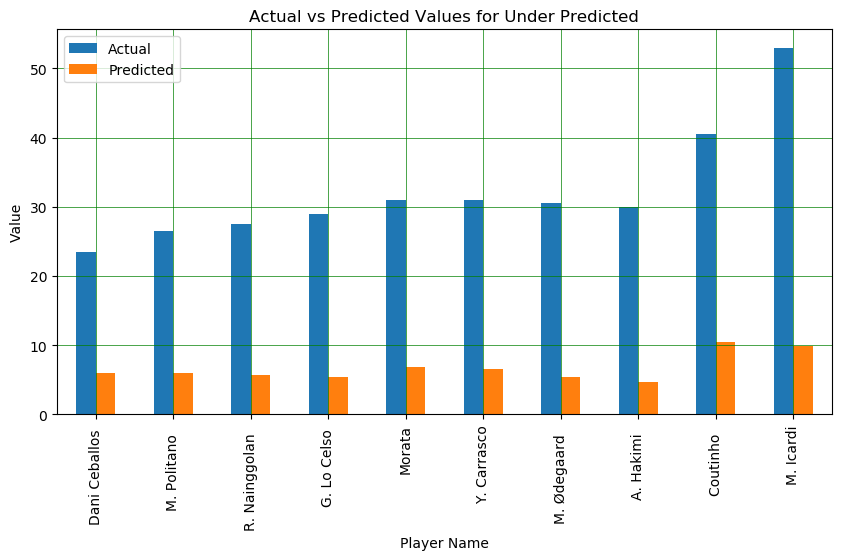

In [854]:
#Plot the comparision of Actual and Predicted Values for Under Predicted
df_over[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Under Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

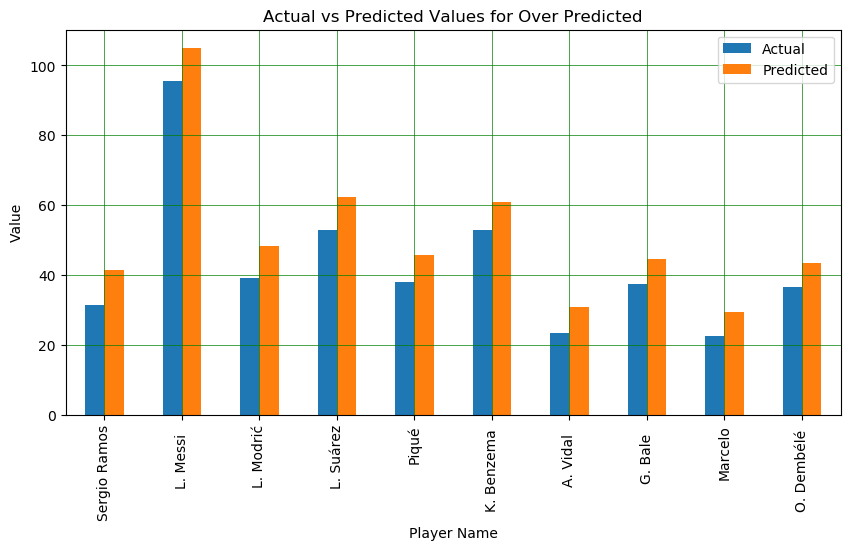

In [855]:
#Plot the comparision of Actual and Predicted Values for Over Predicted

df_under[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Over Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

In [843]:
#Calculating MAE, MSE, RMSE and R^2 values of our model
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('Linear Regression R^2:',regressor.score(X,y))

Mean Absolute Error: 0.5309968036763836
Mean Squared Error: 1.6297451556814957
Root Mean Squared Error: 1.276614724841248
Linear Regression R^2: 0.947839054676928


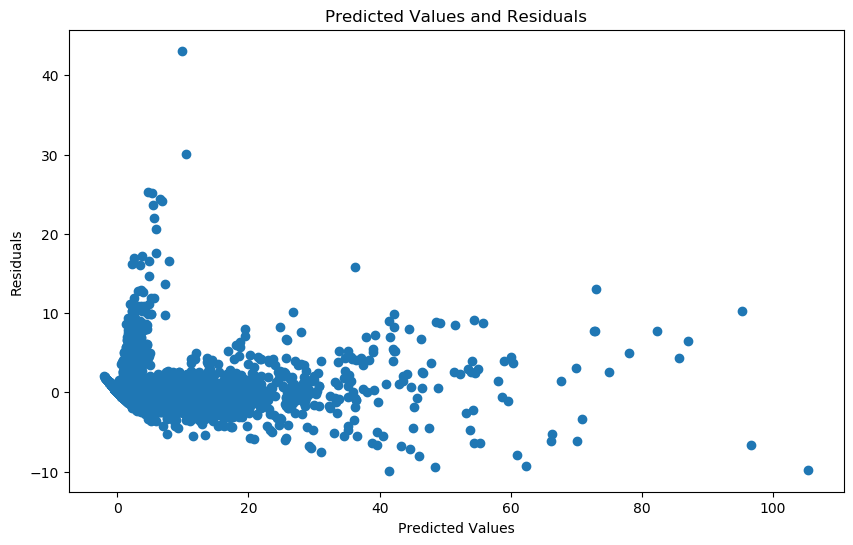

In [859]:
#Plotting Residuals
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(resultsb.predict(), resultsb.resid);
plt.title("Predicted Values and Residuals")
plt.ylabel("Residuals")
plt.xlabel("Predicted Values")
plt.show()

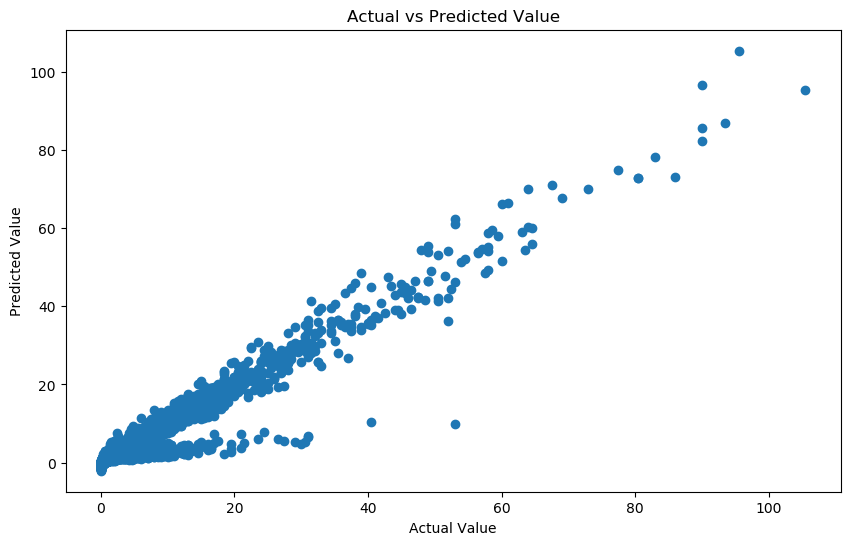

In [775]:
# Actual Values vs Predicted Values
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(y, resultsb.predict(X))
plt.title ("Actual vs Predicted Value")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [863]:
#Model based on most selected columns

X1= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause']]
y1= player_list.loc[:,"Value"]

player_model1 = sm.OLS(y1, X1, data=player_list)

results1 = player_model1.fit()

print(results1.summary());

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                          6.528e+04
Date:                Wed, 29 Jul 2020   Prob (F-statistic):                        0.00
Time:                        12:14:57   Log-Likelihood:                         -30545.
No. Observations:               17779   AIC:                                  6.110e+04
Df Residuals:                   17774   BIC:                                  6.114e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [1322]:
#Correlation matrics of selected features
player_list_selected_features= player_list[['Value_log','Overall','Age','Int_Reputation','Growth','Release_Clause','Height','Weight']]

player_list_selected_features.corr()

,Value_log,Overall,Age,Int_Reputation,Growth,Release_Clause,Height,Weight
Value_log,1.000000,0.972818,0.378720,0.453990,-0.416040,0.621584,0.032087,0.115942
Overall,0.972818,1.000000,0.542752,0.485022,-0.567272,0.596247,0.057984,0.164052
Age,0.378720,0.542752,1.000000,0.385832,-0.872086,0.206696,0.079967,0.227628
Int_Reputation,0.453990,0.485022,0.385832,1.000000,-0.287222,0.597864,0.049608,0.110985
Growth,-0.416040,-0.567272,-0.872086,-0.287222,1.000000,-0.229277,-0.053331,-0.200009
Release_Clause,0.621584,0.596247,0.206696,0.597864,-0.229277,1.000000,0.035241,0.082774
Height,0.032087,0.057984,0.079967,0.049608,-0.053331,0.035241,1.000000,0.760196
Weight,0.115942,0.164052,0.227628,0.110985,-0.200009,0.082774,0.760196,1.000000


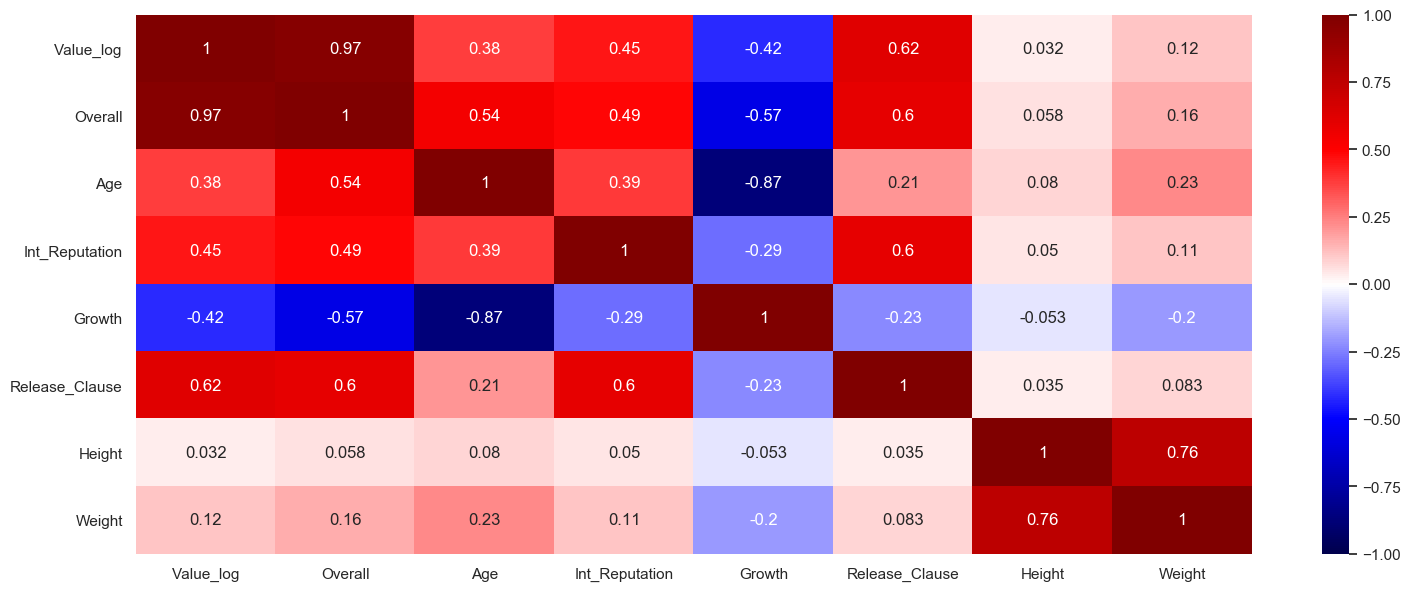

In [1323]:
#Heatmap of correlation values
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
sns.heatmap(player_list_selected_features.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

<Figure size 1800x700 with 0 Axes>

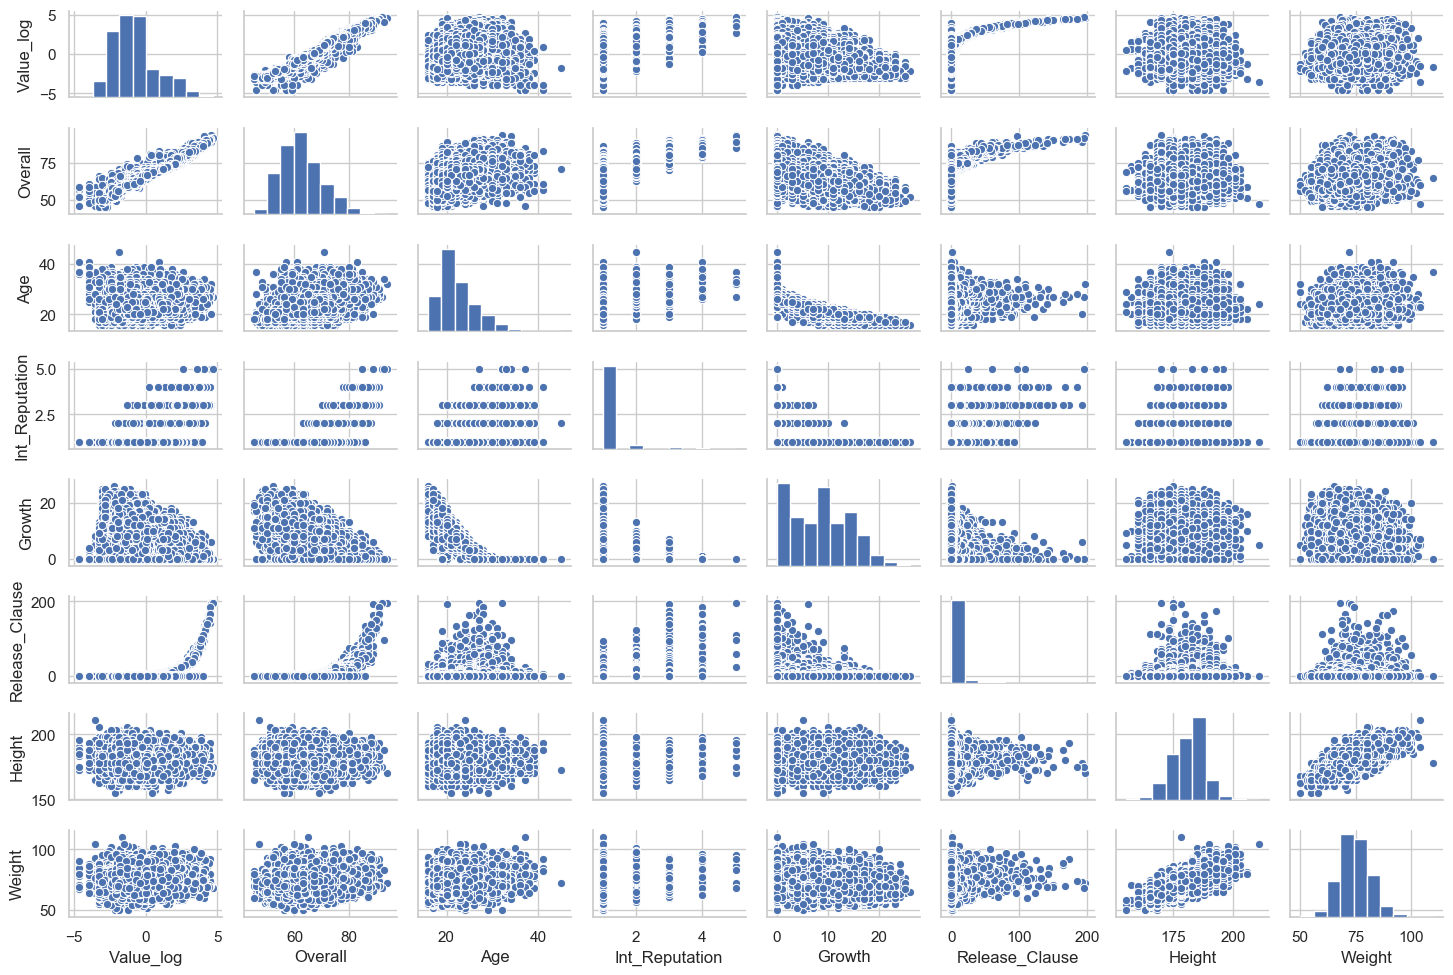

In [1324]:
#Pairplot of selected features
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
g=sns.pairplot(player_list_selected_features, height=1.2, aspect=1.5)
plt.yticks(rotation=90); 
plt.show()

In [964]:
#Split data into train, test and validation (%60 - %20)

X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,y1, test_size=.25, random_state=10)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_val)
mse = np.mean((pred-y_val)**2)

print(lr.score(X_test,y_test))
print(mse)
print(lr.coef_)

0.9479687938913907
1.5758494474682443
[ 0.08044861 -0.10929089  1.63813171 -0.04143074  0.44386838]


In [965]:
coeff = pd.DataFrame(X_train.columns)

coeff['CoefficientEstimate'] = lr.coef_

coeff.sort_values("CoefficientEstimate")

,0,CoefficientEstimate
1,Age,-0.109291
3,Growth,-0.041431
0,Overall,0.080449
4,Release_Clause,0.443868
2,Int_Reputation,1.638132


In [969]:
#set up the 4 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(X.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X1, y1):.3f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.3f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.3f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
print(f'Degree 2 polynomial regression for validayion data R^2: {lm_poly.score(X_val_poly, y_val):.3f}')


Linear Regression for all data R^2: 0.943
Linear Regression for test data R^2: 0.948
Linear Regression for validation data R^2: 0.953

Ridge Regression for test data R^2: 0.945
Ridge Regression for validation data R^2: 0.949

Lasso Regression for test data R^2: -0.000179
Lasso Regression for validation data R^2: -0.000153

Degree 2 polynomial regression for test data R^2: 0.980
Degree 2 polynomial regression for validayion data R^2: 0.982


In [915]:
model= sm.OLS(y1, X1, data=player_list_selected_features)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                          6.528e+04
Date:                Wed, 29 Jul 2020   Prob (F-statistic):                        0.00
Time:                        12:47:12   Log-Likelihood:                         -30545.
No. Observations:               17779   AIC:                                  6.110e+04
Df Residuals:                   17774   BIC:                                  6.114e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [953]:
# Dummy Variables for Position
X2 = pd.concat([player_list.drop('Position', axis=1), pd.get_dummies(player_list['Position'])],axis=1)

X2 = X2.drop(columns=["Value","Name","Team","Foot"])

y2 = yb= player_list.loc[:,"Value"]


In [955]:
# fit model with target as player market value 
player_model2 = sm.OLS(y2, X2, data=player_list)

results2 = player_model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     5119.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:45:54   Log-Likelihood:                -29553.
No. Observations:               17779   AIC:                         5.923e+04
Df Residuals:                   17715   BIC:                         5.973e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.1062      0.005  

In [952]:
# Dummy Variables for Team

X3 = pd.concat([player_list.drop('Team', axis=1), pd.get_dummies(player_list['Team'])],axis=1)

X3 = X3.drop(columns=["Value","Name","Position","Foot"])

y3 = yb= player_list.loc[:,"Value"]

In [956]:
# fit model with target as player market value 
player_model3 = sm.OLS(y3, X3, data=player_list)

results3 = player_model3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     406.9
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:46:07   Log-Likelihood:                -27970.
No. Observations:               17779   AIC:                         5.776e+04
Df Residuals:                   16868   BIC:                         6.485e+04
Df Model:                         910                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [1006]:
#Run Cross Validation

lm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state = 100)
cross_val_score(lm, X1, y1, cv=kf, scoring='r2')

print(round(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')),3))

0.945


# Linear Regression Assumptions

## Assumption 1: regression is linear in parameters and correctly specified



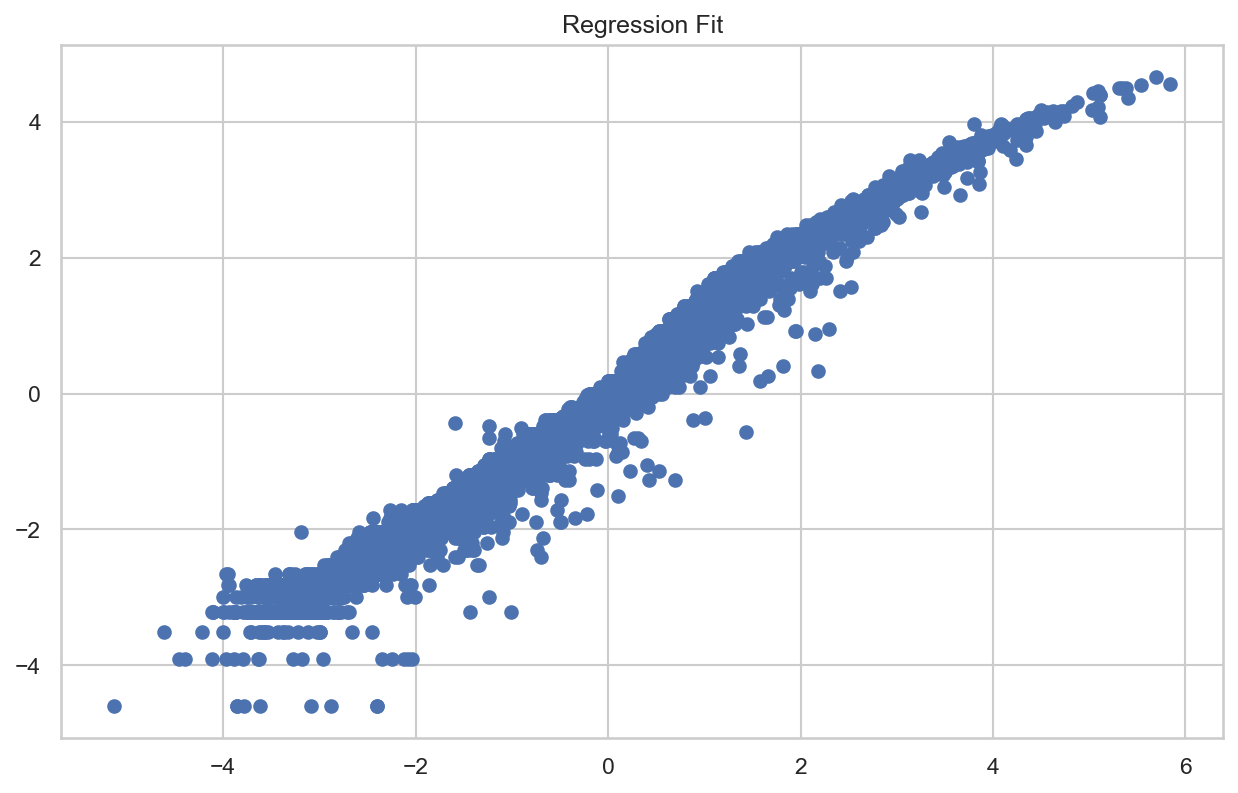

In [1390]:
# Regression Fit
plt.figure(figsize=(10,6),dpi=150),
lr = LinearRegression()
fit = lr.fit(Xs,ys);
pred = lr.predict(Xs)
plt.scatter(pred,ys)
plt.title("Regression Fit")
plt.show()

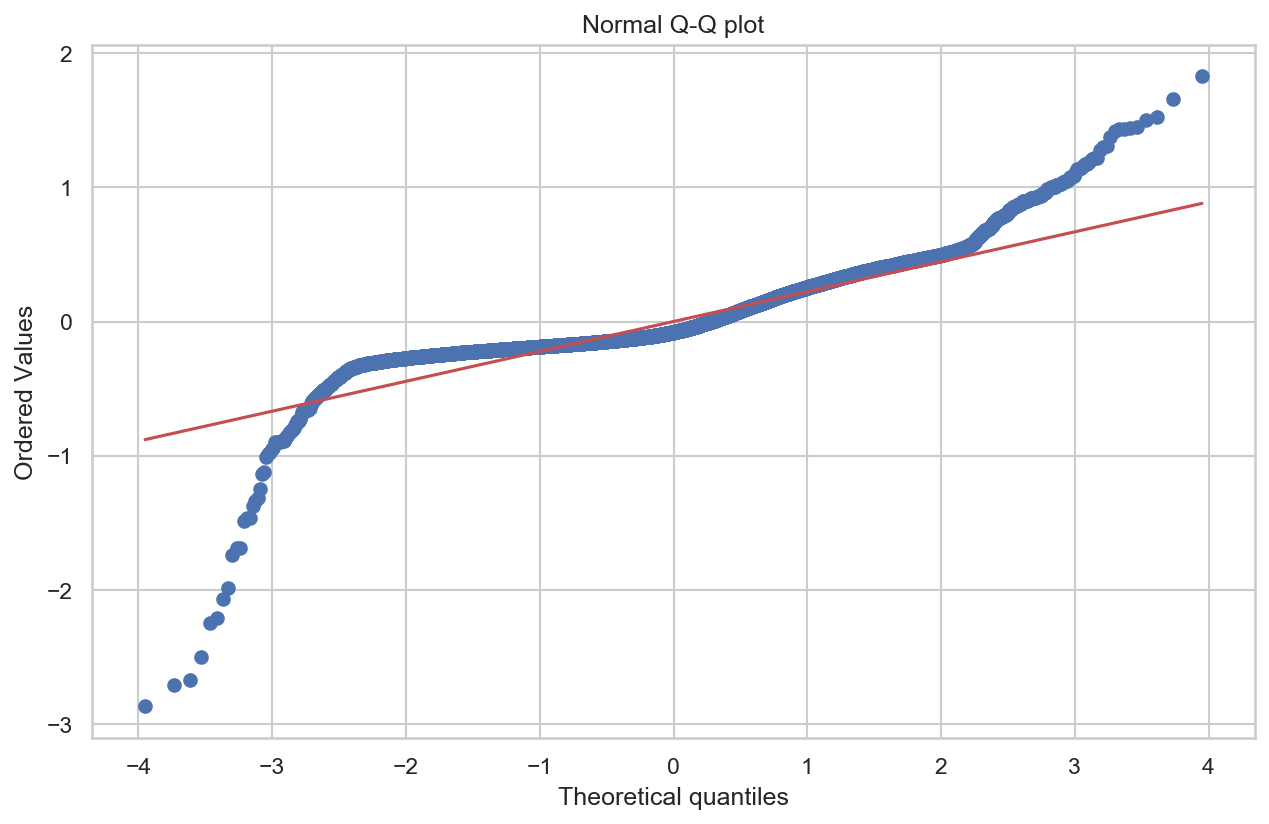

In [1391]:
# Normal Q-Q Plot
plt.figure(figsize=(10,6),dpi=150),
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

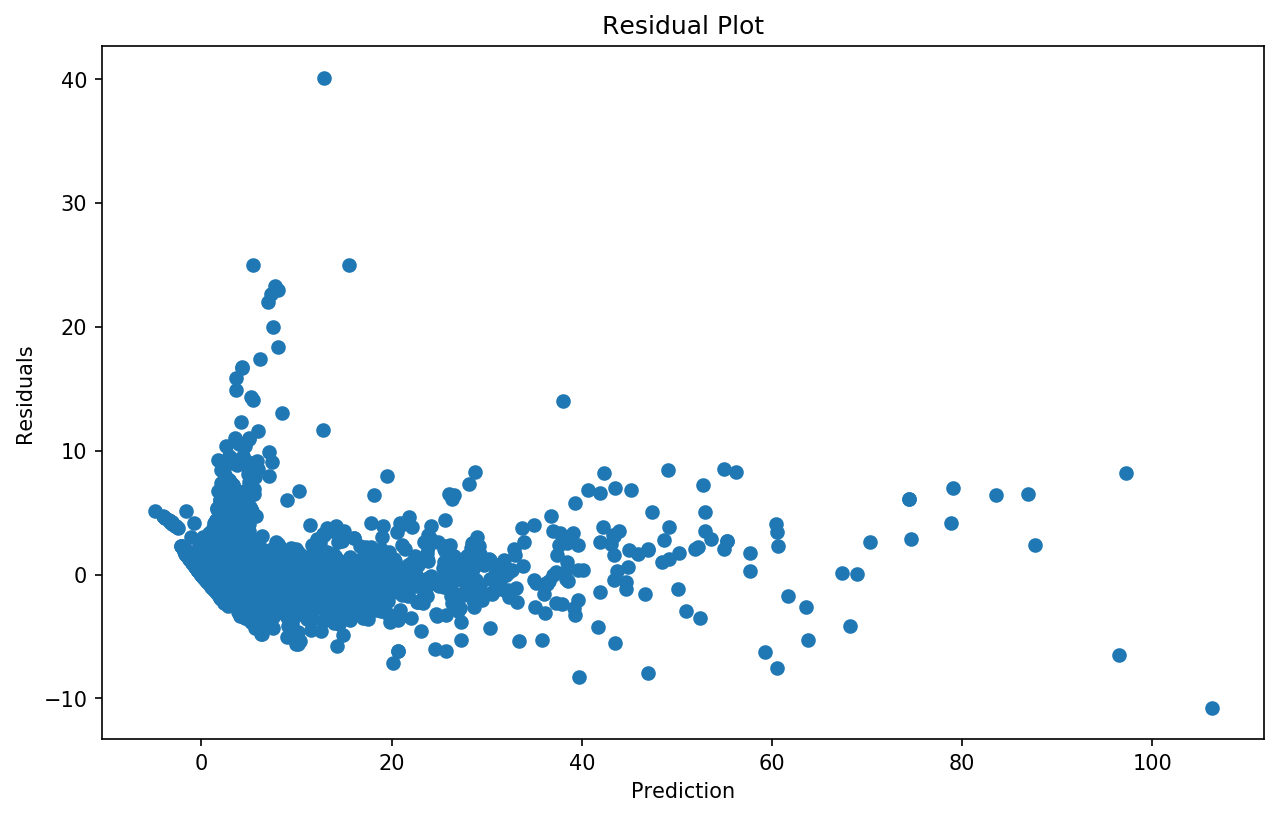

## Assumption 2: residuals should be normally distributed with zero mean

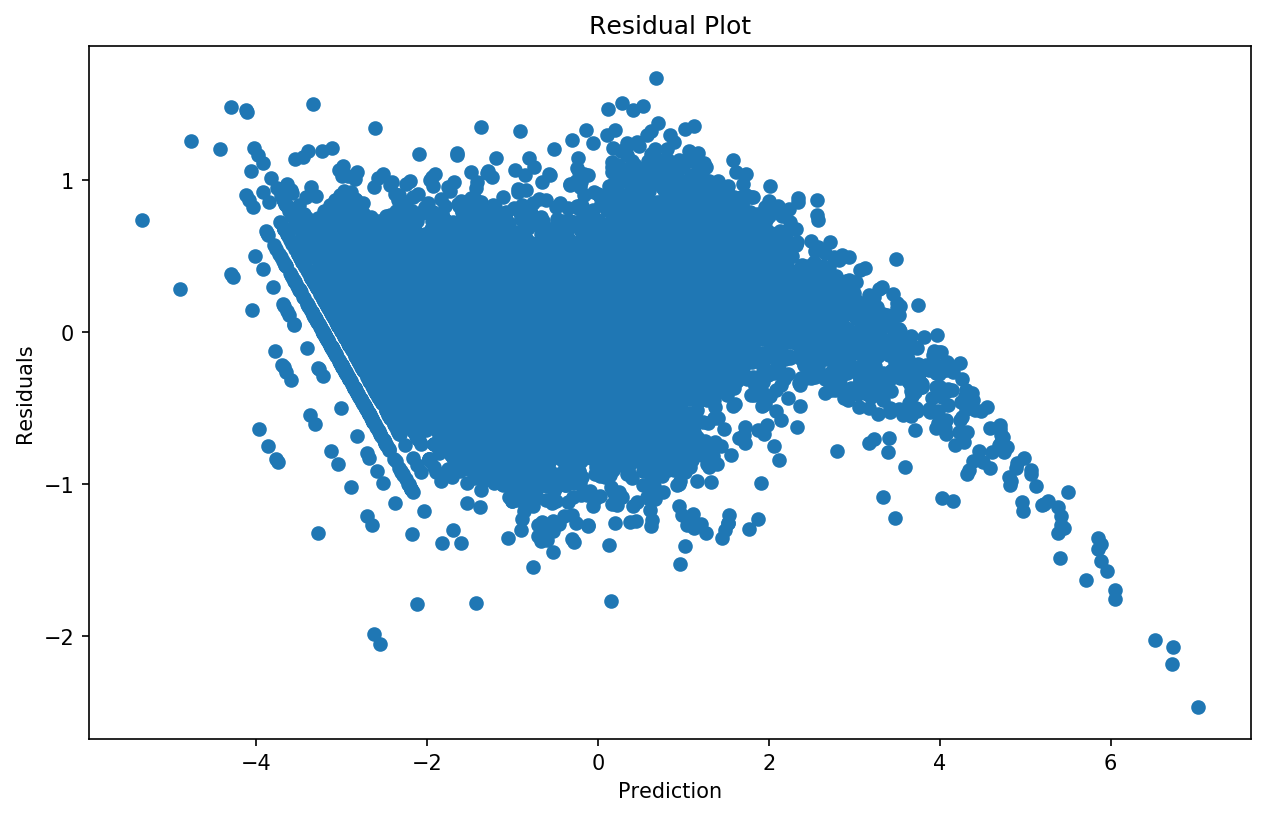

In [1392]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis

player_model = sm.OLS(ys, Xs, data=player_list)

resultsl = player_model.fit()

plt.figure(figsize=(10,6),dpi=150),
plt.style.use('default')
plt.scatter(resultsl.predict(), resultsl.resid);
plt.title("Residual Plot")
plt.ylabel("Residuals")
plt.xlabel("Prediction")
plt.show()

## Assumption 3: Homoscedasticity test for residuals

2

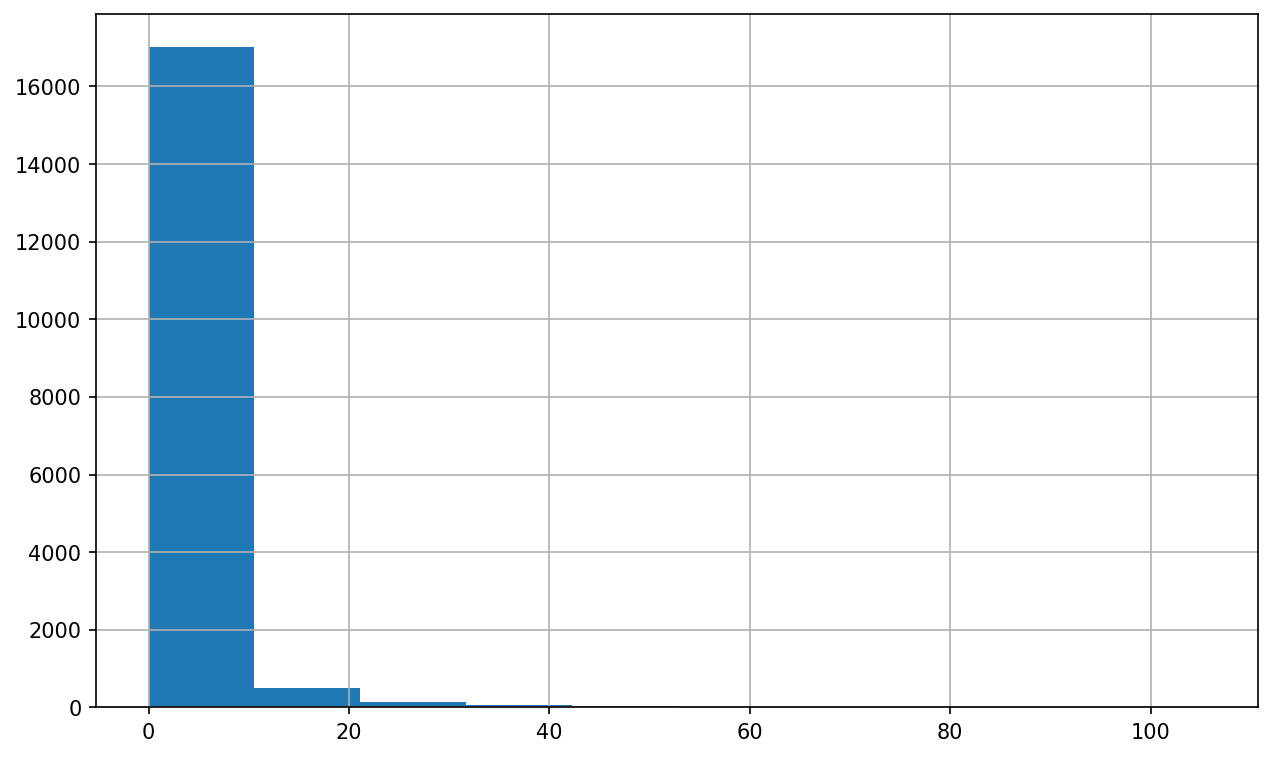

In [1269]:
# create histogram
plt.figure(figsize=(10,6),dpi=150),

y1.hist();
2
# note the positive skew

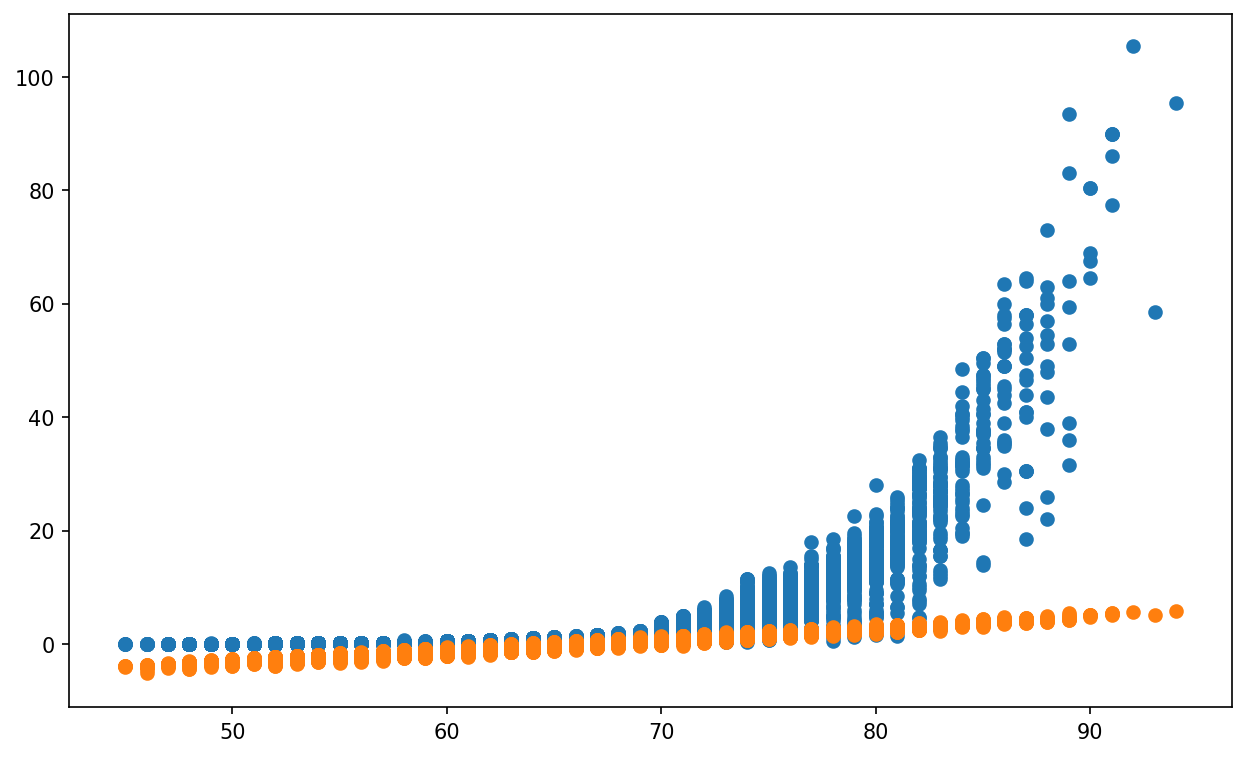

In [1210]:
# quick reg plot
plt.figure(figsize=(10,6),dpi=150),


plt.scatter(X1.Overall,y1)
plt.scatter(X1.Overall,df.predict);

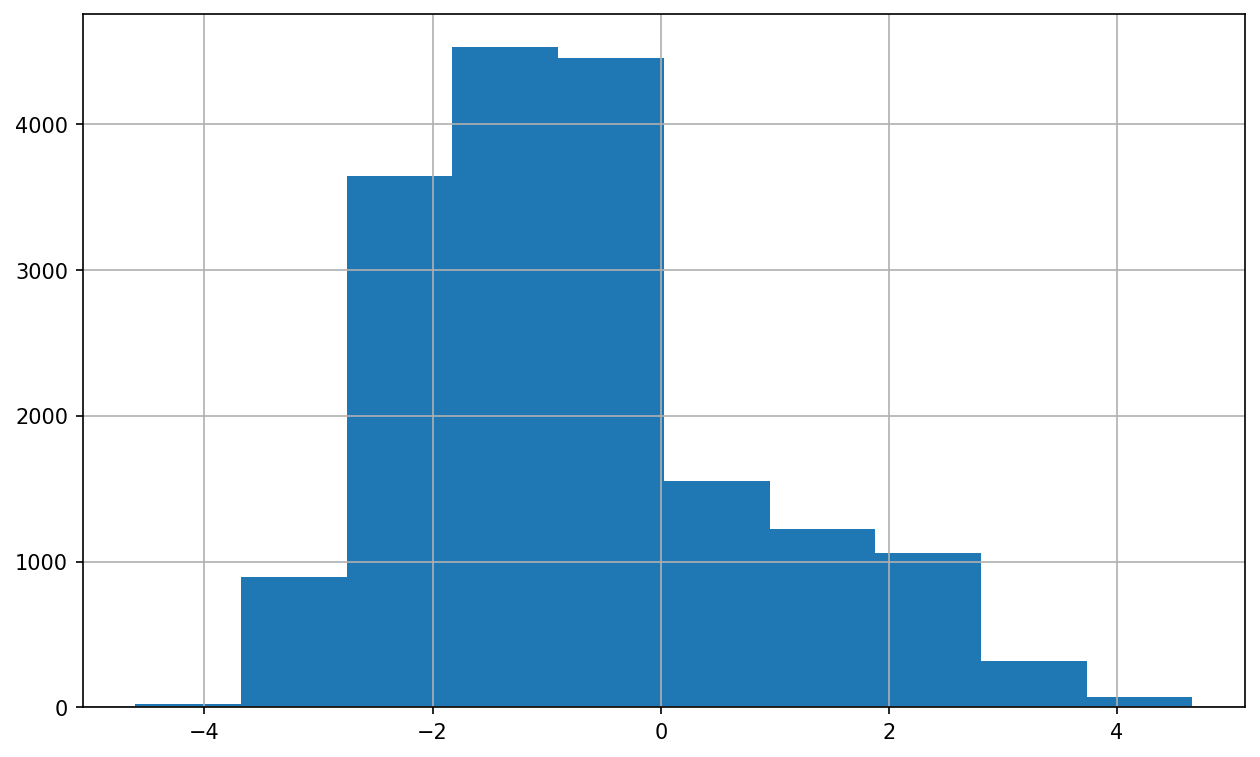

In [1305]:
plt.figure(figsize=(10,6),dpi=150),


np.log(y1).hist();

In [1270]:
#set up the model with log value

X1= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause',]]
y1= player_list.loc[:,"Value"]

yl = np.log1p(y1)

player_model1 = sm.OLS(yl, X1, data=player_list)

results1 = player_model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                          3.829e+04
Date:                Thu, 30 Jul 2020   Prob (F-statistic):                        0.00
Time:                        00:17:00   Log-Likelihood:                         -1377.3
No. Observations:               17779   AIC:                                      2767.
Df Residuals:                   17773   BIC:                                      2813.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Overall            0.0673      0.000    186.891      0.000       0.067       0.068
Age               -0.0361      0.001    -38.337      0.000      -0.038      -0.034
Weight             0.0103      0.000     25.595      0.000       0.009       0.011
Height            -0.0197      0.000    -76.633      0.000      -0.020      -0.019
Growth            -0.0091      0.001    -13.571      0.000      -0.010      -0.008
Release_Clause     0.0268      0.000    115.826      0.000       0.026       0.027
==============================================================================
Omnibus:                     3094.798   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55573.664
Skew:                           0.298   Prob(JB):                         0.00
Kurtosis:                      11.641   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1271]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(X1,yl)
coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False)

,Coefficient
Overall,0.073945
Release_Clause,0.024518
Growth,0.005837
Height,0.001199
Weight,-0.001329
Age,-0.017635


In [1276]:
#Prediction on all data and calculate difference between tha actual value and predicted value
#ye=np.exp(yl)
y_pred = regressor.predict(X1)
df = pd.DataFrame({'Name':player_list.Name,'Actual': yl, 'Predicted': (y_pred)})
df['Actual_n'] = np.expm1(df['Actual'])
df['Predicted_n'] = np.expm1(df['Predicted'])

#df_under = round(df.sort_values('Difference_n').set_index('Name').head(10),2)
#df_over = round(df.sort_values('Difference_n').set_index('Name').tail(10),2)
df

,Name,Actual,Predicted,Actual_n,Predicted_n
0,Z. Ibrahimović,2.708050,2.465751,14.00,10.772315
1,A. Kanno,0.223144,0.350652,0.25,0.419993
2,Brahim,2.397895,2.012667,10.00,6.483252
3,M. Aarons,2.014903,1.740621,6.50,4.700885
4,J. David,2.772589,2.299847,15.00,8.972655
...,...,...,...,...,...
19301,C. Timite,0.741937,0.873914,1.10,1.396272
19302,17 D. Bravo,0.139762,0.154411,0.15,0.166970
19303,K. Miyoshi,1.458615,1.160013,3.30,2.189974
19304,18 F. Banega,0.371564,0.490070,0.45,0.632430


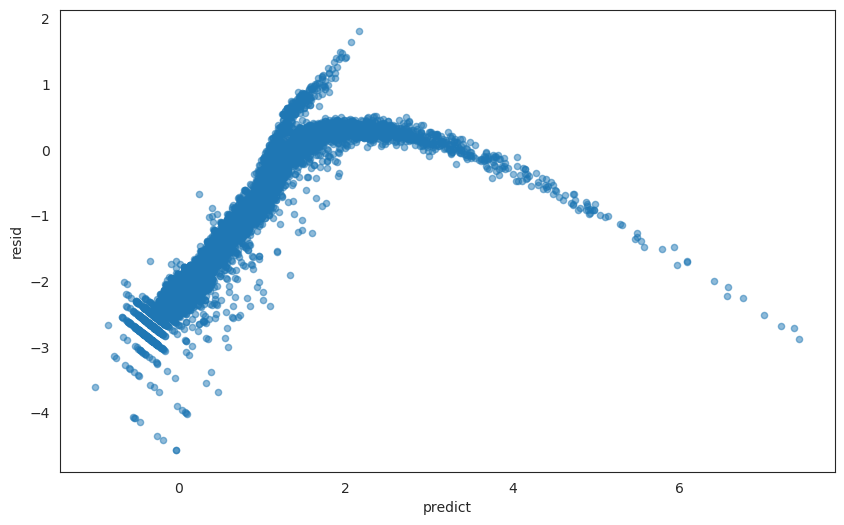

In [1400]:
df['predict']=(regressor.predict(Xs))
df['resid']= (ys-df.predict)
with sns.axes_style('white'):
    plot = df.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))

## Assumption 4: Detecting correlation between residuals and observations


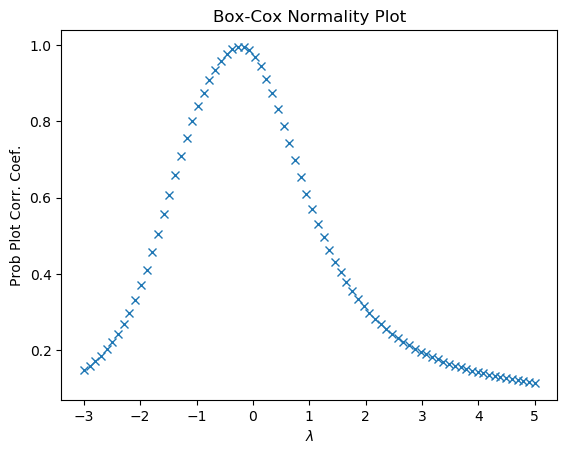

In [1403]:
# plot to show optimal lambda values
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(player_list.Value, -3, 5, plot=ax)

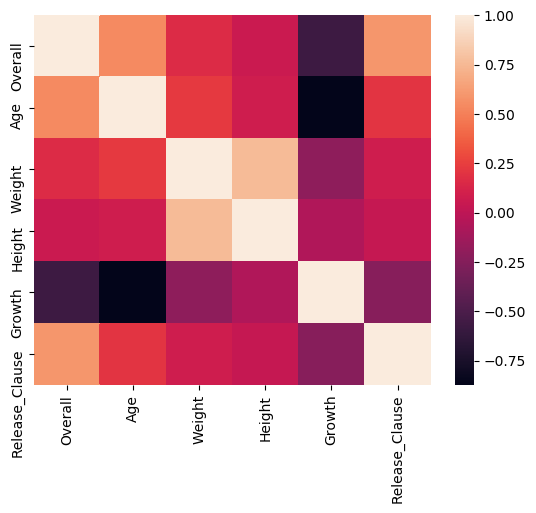

In [1399]:
sns.heatmap(Xs.corr())

## Assumption 5: multicollinearity test according to Condition Number


In [1398]:
#set up the model with log value

Xs= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause']]
ys= player_list.loc[:,"Value_log"]

player_model = sm.OLS(ys, Xs, data=player_list)

results = player_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Value_log   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          4.701e+04
Date:                Thu, 30 Jul 2020   Prob (F-statistic):                        0.00
Time:                        15:52:51   Log-Likelihood:                         -9114.6
No. Observations:               17779   AIC:                                  1.824e+04
Df Residuals:                   17773   BIC:                                  1.829e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Overall            0.1865      0.001    335.190      0.000       0.185       0.188
Age               -0.1124      0.001    -77.213      0.000      -0.115      -0.110
Weight             0.0347      0.001     55.981      0.000       0.033       0.036
Height            -0.0678      0.000   -170.744      0.000      -0.069      -0.067
Growth            -0.0281      0.001    -27.289      0.000      -0.030      -0.026
Release_Clause     0.0108      0.000     30.207      0.000       0.010       0.012
==============================================================================
Omnibus:                      145.329   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.794
Skew:                          -0.036   Prob(JB):                     2.08e-50
Kurtosis:                       3.551   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Final Model 

In [1280]:
#set up the 4 models we're choosing from:

X1= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause',]]
y1= player_list.loc[:,"Value"]

yl = np.log1p(y1)

X_train, X_test, y_train, y_test = train_test_split(X1,yl,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,yl, test_size=.25, random_state=10)


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(X.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X1, yl):.6f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.6f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.6f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.6f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.6f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.6f}')
print(f'Degree 2 polynomial regression for validation data R^2: {lm_poly.score(X_val_poly, y_val):.6f}')


Linear Regression for all data R^2: 0.900083
Linear Regression for test data R^2: 0.902936
Linear Regression for validation data R^2: 0.904690

Ridge Regression for test data R^2: 0.900202
Ridge Regression for validation data R^2: 0.902392

Lasso Regression for test data R^2: -0.000106
Lasso Regression for validation data R^2: -0.000044

Degree 2 polynomial regression for test data R^2: 0.988303
Degree 2 polynomial regression for validation data R^2: 0.988215


In [1281]:
#Run Cross Validation

lm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state = 10)
cross_val_score(lm, X1, yl, cv=kf, scoring='r2')

print(round(np.mean(cross_val_score(lm, X1, yl, cv=kf, scoring='r2')),5))

0.89945


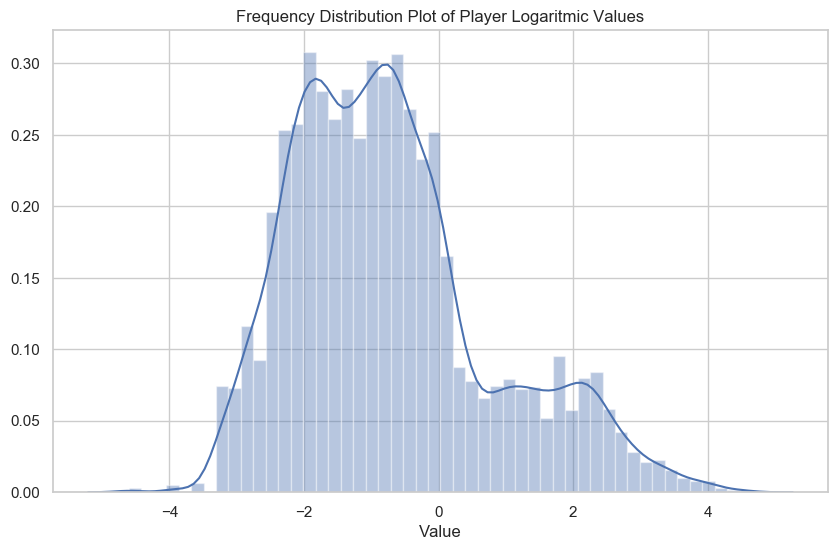

In [1311]:
x = player_list.Value
x = np.log(x)
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Logaritmic Values')
plt.show()

In [1321]:
player_list["Value_log"] = np.log(player_list["Value"])
player_list

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Value_log
0,Z. Ibrahimović,37,85,85,Milan,196.0,95.0,Right,85,ST,0,14.00,0.0580,23.80,400,68,86,80,78,88,397,80,80,78,73,86,304,56,55,72,82,39,392,90,68,59,87,88,368,84,20,91,84,89,90,89,28,37,24,59,13,15,10,9,12,2009,411,5,55,88,77,79,34,78,2.639057
1,A. Kanno,29,62,62,Al Fayha,180.0,67.0,Right,62,CB,0,0.25,0.0040,0.41,201,33,24,60,55,29,203,50,28,24,48,53,294,56,61,63,54,60,285,37,86,66,71,25,231,60,58,28,49,36,52,185,61,62,62,54,12,7,14,9,12,1453,314,1,59,28,45,53,61,68,-1.386294
2,Brahim,19,74,86,Real Madrid,170.0,68.0,Left,75,CAM,12,10.00,0.0630,22.50,286,60,69,30,72,55,332,82,72,47,50,81,394,78,75,83,70,88,291,70,65,54,35,67,258,41,20,69,70,58,72,87,43,23,21,51,13,9,13,10,6,1699,362,1,76,68,65,82,29,42,2.302585
3,M. Aarons,19,73,85,Norwich City,178.0,73.0,Right,74,RB,12,6.50,0.0170,14.30,269,64,41,53,70,41,286,73,50,32,57,74,393,84,80,82,68,79,274,46,49,79,64,36,284,68,69,64,56,27,75,217,74,73,70,46,11,11,7,9,8,1769,396,1,82,41,61,74,70,68,1.871802
4,J. David,19,77,88,KAA Gent,178.0,77.0,Right,79,ST,11,15.00,0.0130,25.50,363,63,81,72,76,71,320,79,56,34,73,78,399,85,87,78,71,78,379,75,80,81,74,69,268,25,17,75,73,78,83,61,21,21,19,39,7,7,11,7,7,1829,400,1,86,76,69,78,25,66,2.708050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19301,C. Timite,21,67,74,Paris FC,178.0,79.0,Right,68,ST,7,1.10,0.0030,0.00,295,59,62,61,59,54,280,70,48,40,54,68,373,82,80,75,62,74,325,76,67,65,69,48,255,50,30,67,52,56,57,101,30,33,38,47,9,7,11,10,10,1676,367,1,81,62,55,70,35,64,0.095310
19302,17 D. Bravo,18,56,69,San Luis de Quillota,173.0,70.0,Left,55,LB,13,0.15,0.0005,0.00,189,49,30,45,45,20,213,55,32,30,43,53,321,70,68,66,45,72,260,35,65,75,57,28,194,40,50,40,31,33,45,165,51,55,59,40,7,13,7,6,7,1382,308,1,69,31,41,56,52,59,-1.897120
19303,K. Miyoshi,22,71,78,Royal Antwerp FC,168.0,64.0,Left,72,CAM,7,3.30,0.0070,0.00,301,68,65,37,70,61,335,71,69,63,62,70,419,92,74,94,70,89,349,68,90,71,51,69,253,43,26,57,71,56,57,117,38,35,44,49,8,9,15,7,10,1823,380,1,82,65,68,74,35,56,1.193922
19304,18 F. Banega,20,61,73,San Martín de San Juan,170.0,62.0,Right,63,CAM,12,0.45,0.0020,0.00,249,49,45,49,69,37,262,61,39,35,61,66,362,71,68,85,61,77,254,44,71,65,31,43,259,52,43,55,68,41,41,153,48,55,50,51,13,12,6,10,10,1590,334,1,69,44,60,66,49,46,-0.798508


In [1338]:
Xs= player_list.loc[:,['Overall','Age','Growth','Release_Clause', 'Weight','Height']]
ys= player_list.loc[:,"Value_log"]

player_models = sm.OLS(ys, Xs, data=player_list)

resultss = player_models.fit()

print(resultss.summary());

                                 OLS Regression Results                                
Dep. Variable:              Value_log   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          4.701e+04
Date:                Thu, 30 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:40:09   Log-Likelihood:                         -9114.6
No. Observations:               17779   AIC:                                  1.824e+04
Df Residuals:                   17773   BIC:                                  1.829e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [1334]:
player_list["Value_logp"]=np.log1p(player_list["Value"])
player_list

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Value_log,Value_logp
0,Z. Ibrahimović,37,85,85,Milan,196.0,95.0,Right,85,ST,0,14.00,0.0580,23.80,400,68,86,80,78,88,397,80,80,78,73,86,304,56,55,72,82,39,392,90,68,59,87,88,368,84,20,91,84,89,90,89,28,37,24,59,13,15,10,9,12,2009,411,5,55,88,77,79,34,78,2.639057,2.708050
1,A. Kanno,29,62,62,Al Fayha,180.0,67.0,Right,62,CB,0,0.25,0.0040,0.41,201,33,24,60,55,29,203,50,28,24,48,53,294,56,61,63,54,60,285,37,86,66,71,25,231,60,58,28,49,36,52,185,61,62,62,54,12,7,14,9,12,1453,314,1,59,28,45,53,61,68,-1.386294,0.223144
2,Brahim,19,74,86,Real Madrid,170.0,68.0,Left,75,CAM,12,10.00,0.0630,22.50,286,60,69,30,72,55,332,82,72,47,50,81,394,78,75,83,70,88,291,70,65,54,35,67,258,41,20,69,70,58,72,87,43,23,21,51,13,9,13,10,6,1699,362,1,76,68,65,82,29,42,2.302585,2.397895
3,M. Aarons,19,73,85,Norwich City,178.0,73.0,Right,74,RB,12,6.50,0.0170,14.30,269,64,41,53,70,41,286,73,50,32,57,74,393,84,80,82,68,79,274,46,49,79,64,36,284,68,69,64,56,27,75,217,74,73,70,46,11,11,7,9,8,1769,396,1,82,41,61,74,70,68,1.871802,2.014903
4,J. David,19,77,88,KAA Gent,178.0,77.0,Right,79,ST,11,15.00,0.0130,25.50,363,63,81,72,76,71,320,79,56,34,73,78,399,85,87,78,71,78,379,75,80,81,74,69,268,25,17,75,73,78,83,61,21,21,19,39,7,7,11,7,7,1829,400,1,86,76,69,78,25,66,2.708050,2.772589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19301,C. Timite,21,67,74,Paris FC,178.0,79.0,Right,68,ST,7,1.10,0.0030,0.00,295,59,62,61,59,54,280,70,48,40,54,68,373,82,80,75,62,74,325,76,67,65,69,48,255,50,30,67,52,56,57,101,30,33,38,47,9,7,11,10,10,1676,367,1,81,62,55,70,35,64,0.095310,0.741937
19302,17 D. Bravo,18,56,69,San Luis de Quillota,173.0,70.0,Left,55,LB,13,0.15,0.0005,0.00,189,49,30,45,45,20,213,55,32,30,43,53,321,70,68,66,45,72,260,35,65,75,57,28,194,40,50,40,31,33,45,165,51,55,59,40,7,13,7,6,7,1382,308,1,69,31,41,56,52,59,-1.897120,0.139762
19303,K. Miyoshi,22,71,78,Royal Antwerp FC,168.0,64.0,Left,72,CAM,7,3.30,0.0070,0.00,301,68,65,37,70,61,335,71,69,63,62,70,419,92,74,94,70,89,349,68,90,71,51,69,253,43,26,57,71,56,57,117,38,35,44,49,8,9,15,7,10,1823,380,1,82,65,68,74,35,56,1.193922,1.458615
19304,18 F. Banega,20,61,73,San Martín de San Juan,170.0,62.0,Right,63,CAM,12,0.45,0.0020,0.00,249,49,45,49,69,37,262,61,39,35,61,66,362,71,68,85,61,77,254,44,71,65,31,43,259,52,43,55,68,41,41,153,48,55,50,51,13,12,6,10,10,1590,334,1,69,44,60,66,49,46,-0.798508,0.371564


In [1359]:
#set up the 4 models we're choosing from:

Xs= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause','Height','Weight']]
ys= player_list.loc[:,"Value_log"]

#Split data train (%60), test(%20) and validation (%20)
X, X_test, y, y_test = train_test_split(Xs,ys,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.25, random_state=10)


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

Xs_poly = poly.fit_transform(X.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(Xs, ys):.6f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.6f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.6f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.6f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.6f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.6f}')
print(f'Degree 2 polynomial regression for validation data R^2: {lm_poly.score(X_val_poly, y_val):.6f}')


Linear Regression for all data R^2: 0.979805
Linear Regression for test data R^2: 0.980115
Linear Regression for validation data R^2: 0.980487

Ridge Regression for test data R^2: 0.974431
Ridge Regression for validation data R^2: 0.974795

Lasso Regression for test data R^2: -0.000182
Lasso Regression for validation data R^2: -0.000216

Degree 2 polynomial regression for test data R^2: 0.991367
Degree 2 polynomial regression for validation data R^2: 0.990845


In [1373]:
# Run Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state = 16)
cross_val_score(lm, Xs, ys, cv=kf, scoring='r2')

print('Linear Regression:',round(np.mean(cross_val_score(lm, Xs, ys, cv=kf, scoring='r2')),5))
print('Ridge Regression:',round(np.mean(cross_val_score(lm_reg, Xs, ys, cv=kf, scoring='r2')),5))
print('Lasso Regression:',round(np.mean(cross_val_score(lm_lasso, Xs, ys, cv=kf, scoring='r2')),5))
print('Degree 2 Poly. Regression:',round(np.mean(cross_val_score(lm_poly, Xs, ys, cv=kf, scoring='r2')),5))

Linear Regression: 0.97977
Ridge Regression: 0.97433
Lasso Regression: -0.00028
Degree 2 Poly. Regression: 0.97977


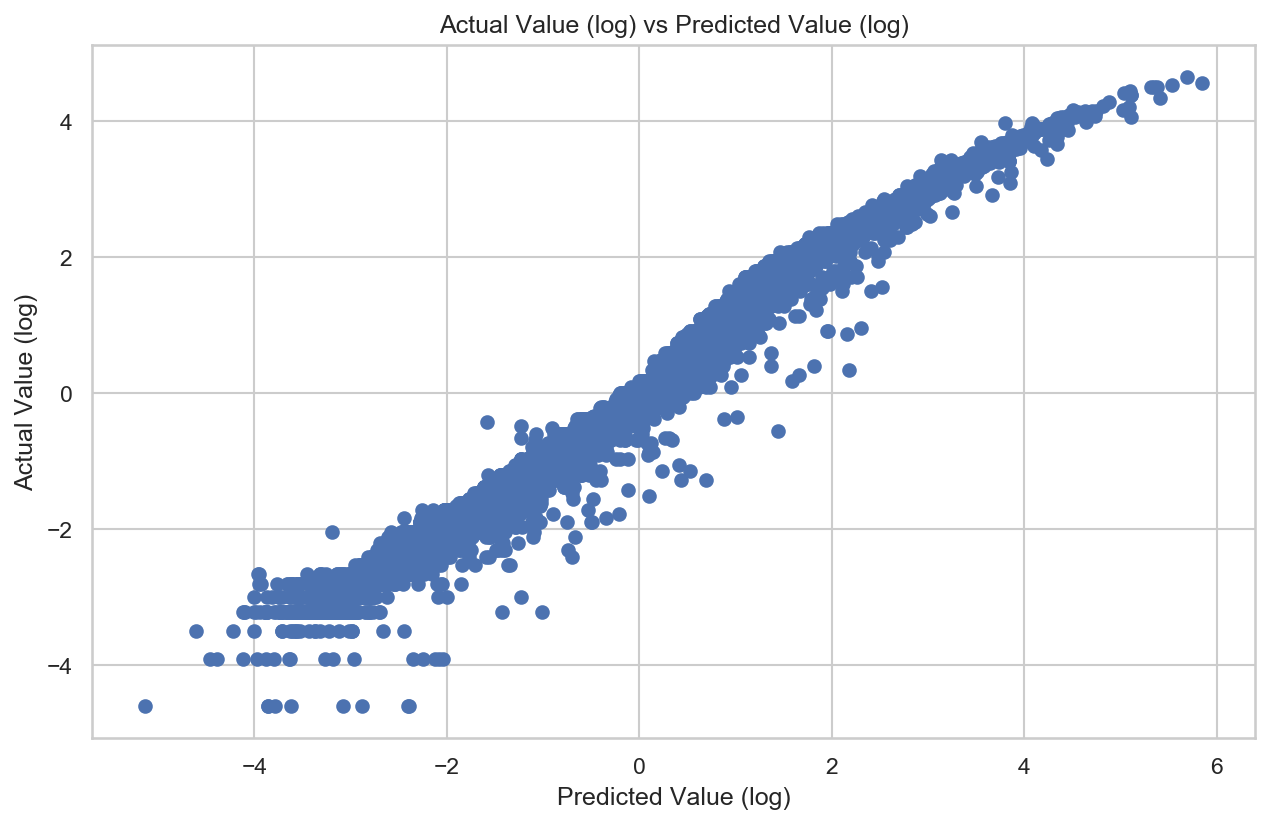

In [1379]:
# Regression Fit with Log
plt.figure(figsize=(10,6),dpi=150),
lr = LinearRegression()
fit = lr.fit(Xs,ys);
pred = lr.predict(Xs)
plt.scatter(pred,ys)
plt.title("Actual Value (log) vs Predicted Value (log)")
plt.xlabel("Predicted Value (log)")
plt.ylabel("Actual Value (log)")
plt.show()

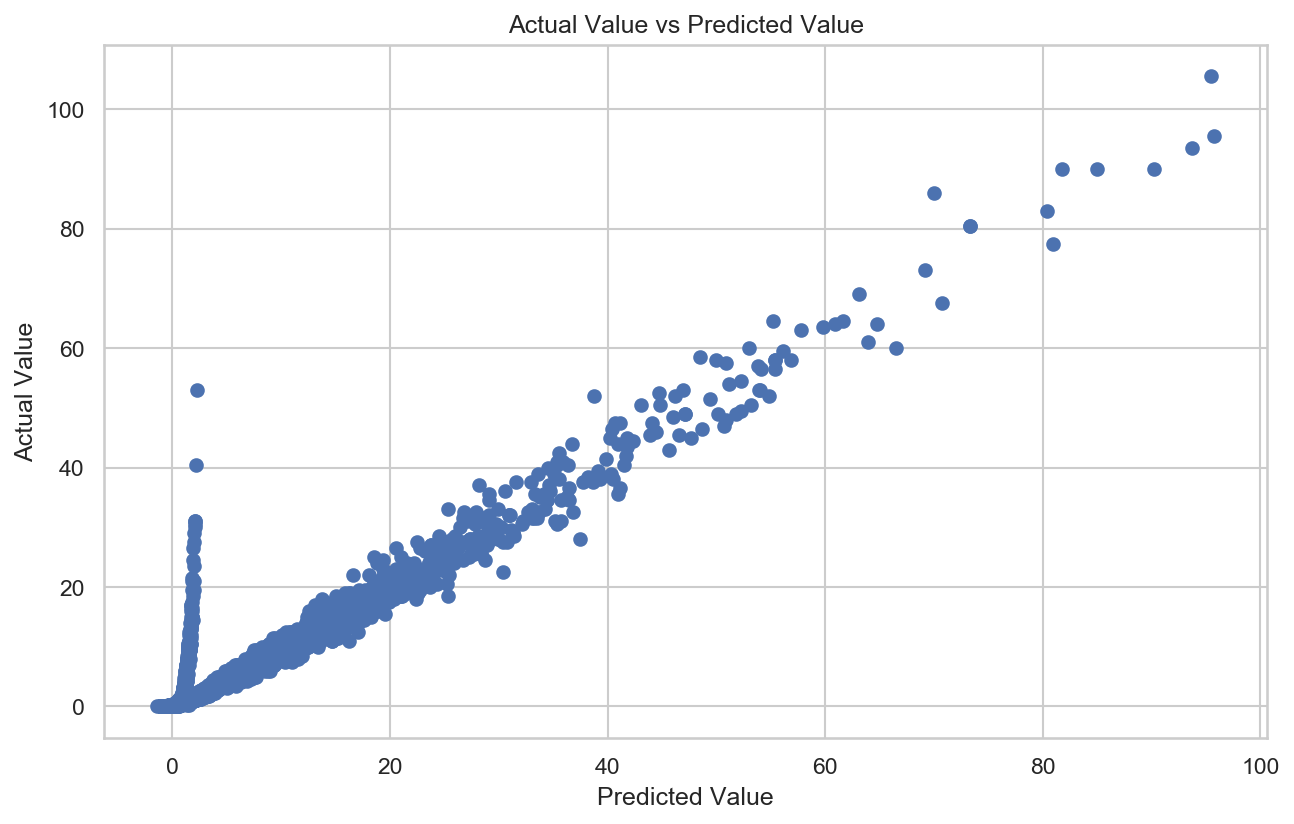

In [1389]:
# Regression Fit with Log
plt.figure(figsize=(10,6),dpi=150),
lr = LinearRegression()
fit = lr.fit(Xs,np.exp(ys));
pred = lr.predict(Xs)
plt.scatter(pred,np.exp(ys))
plt.title("Actual Value vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

In [1386]:
ys

0        2.639057
1       -1.386294
2        2.302585
3        1.871802
4        2.708050
           ...   
19301    0.095310
19302   -1.897120
19303    1.193922
19304   -0.798508
19305   -0.385662
Name: Value_log, Length: 17779, dtype: float64